In [1]:
%load_ext line_profiler
import mpld3
mpld3.enable_notebook()

In [2]:
%matplotlib nbagg

import jefimenko
import pdb
import numpy as np

Jefimenko version 0.0.1


In [3]:
def test_charge_1(print_all=False):
    mapping = jefimenko.Grid(delta=[1, 1, 1],  # this is the size of a step in x, y and z in meters
                size=[10, 1, 1],  # this is the size of the grid in meters
                time=10 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9,  # this is the size of a full time step
        )
    pass_count_E = 0
    pass_count_H = 0
    fail_count_E  = 0
    fail_count_H  = 0
 

    count = mapping.Add_Charge([0], Q = 1, count=True)
    
    if print_all is True:
        jefimenko.plot_grid(mapping)

    jefimenko.simulate(mapping)

    if(mapping.grid['E'][0][1][0][0] == [0, 0, 0]).all():
        if print_all == True:
            print("time == 0 R == 1 E field PASS")
        pass_count_E = pass_count_E + 1
    else:
        if print_all == True:
            print("time = 0 R == 1 E field FAIL")
        fail_count_E = fail_count_E + 1

    if(mapping.grid['H'][0][1][0][0] == [0, 0, 0]).all():
        if print_all == True:
            print("time == 0 R == 1 H field PASS")
        pass_count_H = pass_count_H + 1
    else:
        if print_all == True:
            print("time == 0 R == 1 H field FAIL")
        fail_count_H = Fail_count_H + 1

    test_array = [8987551787.368176, 0, 0]

    if (mapping.grid['E'][1][1][0][0] - test_array < .01).all():
        if print_all == True:
            percent = (np.linalg.norm(mapping.grid['E'][1][1][0][0] - 8987551787.368176) / 8987551787.368176)
            print("time == 1 R == 1 E filed PASS")
        pass_count_E = pass_count_E + 1
    else:
        if print_all == True:
            print("time == 0 R == 1 E field FAIL")   
        fail_count_E = fail_count_E + 1

    test_array = [2246887946.842, 0, 0]
    if (mapping.grid['E'][1][2][0][0] - test_array < .01).all():
        if print_all == True:
            print("time == 1 R == 2 E field PASS")
        pass_count_E = pass_count_E + 1
    else:
        if print_all == True:
            print("time == 1 R == 2 E field FAIL")
            print(mapping.grid['E'][1][2][0][0])
        fail_count_E = fail_count_E + 1
        
    if(mapping.grid['H'][1][1][0][0] == [0, 0, 0]).all():
        if print_all == True:
            print("time == 1 R == 1 H field PASS")
        pass_count_H = pass_count_H + 1
    else:
        if print_all == True:
            print("time == 1 R == 1 H field FAIL")
        fail_count_H = fail_count_H + 1

    return([pass_count_E, fail_count_E, pass_count_H, fail_count_H])

In [4]:
test = test_charge_1()
print('E Field Pass count = ' + str(test[0]))
print('E Field Fail count = ' + str(test[1]))
print('H Field Pass count = ' + str(test[2]))
print('H Field Fail count = ' + str(test[3]))

simulation started
stage one charges and currents
grid simulated in 0.014460563659667969 seconds

E Field Pass count = 3
E Field Fail count = 0
H Field Pass count = 2
H Field Fail count = 0


In [5]:
def plasma_constant_E(print_all=False):
    time_L = 16
    delta_t = 1
    E_field = [1, 0, 0]
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[10,10,10],  # this is the size of the grid in meters
                time=time_L,  # this is the length of a simulation in secounds
                delta_t=delta_t,  # this is the size of a full time step
                constant_E=E_field,
                constant_H=[0,0,0]
        )
    pass_count = 0
    fail_count = 0
    
    charge = .00001
    velocity = np.array([0,0,0])
    acc = np.array([0, 0, 0])
    mass = 1
    mapping.Add_Charge([0, 0, 0], Q = charge, velocity=velocity, acceleration=acc, mass=mass)
    E_field = np.array(E_field)
    jefimenko.plasma_simulation(mapping)
    
    for t in range(int(time_L / delta_t)):
        test_valu = (1 / 2) * charge * E_field * (t * delta_t)**2
        if print_all == 1:
            print(t)
            print("location")
            print(mapping.charges[t][0].location)
            print("test location")
            print(test_valu)
            print()

        if ((mapping.charges[t][0].location <= test_valu + mapping.charges[t][0].location*.001).all() and 
            (mapping.charges[t][0].location >= test_valu - mapping.charges[t][0].location*.001).all()):
            pass_count += 1
        else:
            fail_count += 1

    print("pass count is " + str(pass_count))
    print("fail count is " + str(fail_count))
    
    
#    for time in range(int(time_L / delta_t)):
#        jefimenko.plot_grid(mapping, time)
#        #jefimenko.plot_EM_grid('E', mapping, time)
#        #jefimenko.plot_EM_grid('H', mapping, time)
#        print('simulation time is ' + str(time))
#        print(mapping.charges[time][0].location)
#    return()

In [6]:
plasma_constant_E()

grid simulated in 0.015332221984863281 seconds

pass count is 16
fail count is 0


In [7]:
def plasma_constant_H(print_all=False, test=False):
    time_L = 10
    delta_t = .1
    H_field = [0, 0, 1]
    B_z = 1
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[10,10,10],  # this is the size of the grid in meters
                time=time_L,  # this is the length of a simulation in secounds
                delta_t=delta_t,  # this is the size of a full time step
                constant_E=[0,0,0],
                constant_H=[0,0,B_z]
        )
    pass_count = 0
    fail_count = 0
    
    charge = 3.14159 / time_L
    velocity = np.array([1,0,0])
    acc = np.array([0, 0, 0])
    mass = 1
    mapping.Add_Charge([0, 0, 0], Q = charge, velocity=velocity, acceleration=acc, mass=mass)
    H_field = np.array(H_field)
    jefimenko.plasma_simulation(mapping, test)
    
    for t in range(int(time_L / delta_t)):
        w_c = charge * B_z / mass
        test_valu_1 = np.cos(w_c * t * delta_t)
        test_valu_2 = -np.sin(w_c * t * delta_t)
        test_valu = np.array([test_valu_1, test_valu_2, 0])
        if print_all == 1:
            print(t)
            print("velocity")
            print(mapping.charges[t][0].velocity)
            print("test velocity")
            print(test_valu)
            # print(np.linalg.norm(mapping.charges[t][0].velocity) / np.linalg.norm(test_valu))
            print(np.abs(test_valu) * .1 )
            print(np.abs(mapping.charges[t][0].velocity - test_valu))
            print((np.abs(mapping.charges[t][0].velocity - test_valu) <= np.abs(test_valu) * .1 ))
            print()

        if (np.abs(mapping.charges[t][0].velocity - test_valu) <= np.abs(test_valu) * .1 ).all():
            pass_count += 1
        else:
            fail_count += 1

    print("pass count is " + str(pass_count))
    print("fail count is " + str(fail_count))
    
    
#    for time in range(int(time_L / delta_t)):
#        jefimenko.plot_grid(mapping, time)
#        #jefimenko.plot_EM_grid('E', mapping, time)
#        #jefimenko.plot_EM_grid('H', mapping, time)
#        print('simulation time is ' + str(time))
#        print(mapping.charges[time][0].location)
#    return()

In [8]:
plasma_constant_H()

grid simulated in 0.11977434158325195 seconds

pass count is 99
fail count is 1


In [9]:
def plasma_constant_E_function(print_all=False, test=False):
    time_L = 16
    delta_t = 1
    E_field = lambda location, time: [1, 0, 0]
#    E_field = [1, 0, 0]
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[10,10,10],  # this is the size of the grid in meters
                time=time_L,  # this is the length of a simulation in secounds
                delta_t=delta_t,  # this is the size of a full time step
                constant_E=E_field,
                constant_H=[0,0,0]
        )
    pass_count = 0
    fail_count = 0
    
    charge = .00001
    velocity = np.array([0,0,0])
    acc = np.array([0, 0, 0])
    mass = 1
    mapping.Add_Charge([0, 0, 0], Q = charge, velocity=velocity, acceleration=acc, mass=mass)
    E_field = np.array(E_field)
    jefimenko.plasma_simulation(mapping, test)

    for t in range(int(time_L / delta_t)):
        test_valu = (1 / 2) * charge * np.array([1,0,0]) * (t * delta_t)**2
        if print_all == 1:
            print(t)
            print("location")
            print(mapping.charges[t][0].location)
            print("test location")
            print(test_valu)
            print()

        if ((mapping.charges[t][0].location <= test_valu + mapping.charges[t][0].location*.001).all() and 
            (mapping.charges[t][0].location >= test_valu - mapping.charges[t][0].location*.001).all()):
            pass_count += 1
        else:
            fail_count += 1

    print("pass count is " + str(pass_count))
    print("fail count is " + str(fail_count))
    
    
#    for time in range(int(time_L / delta_t)):
#        jefimenko.plot_grid(mapping, time)
#        #jefimenko.plot_EM_grid('E', mapping, time)
#        #jefimenko.plot_EM_grid('H', mapping, time)
#        print('simulation time is ' + str(time))
#        print(mapping.charges[time][0].location)
#    return()

In [10]:
plasma_constant_E_function(test=True)

charge list is
[array([0., 0., 0.])]



location test
E = {'[0. 0. 0.]': array([[1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j]])}
H = {'[0. 0. 0.]': array([[0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j,

/home/storage/nehemiah/Nehemiah/linux/programing/jefimenko/git/optimized plasma/Jefimenko/jefimenko/plasma.py:130: ComplexWarning: Casting complex values to real discards the imaginary part
  grid.charges[time][n].acceleration = acceleration.astype(float)
/home/storage/nehemiah/Nehemiah/linux/programing/jefimenko/git/optimized plasma/Jefimenko/jefimenko/plasma.py:134: ComplexWarning: Casting complex values to real discards the imaginary part
  grid.charges[time+1][n].velocity = velocity.astype(float)


In [11]:
#pdb.set_trace()

In [12]:
def plasma_constant_H_function(print_all=False):
    H_field = lambda location, time: [0, 0, 1]
    time_L = 10
    delta_t = .1
    H_field = [0, 0, 1]
    B_z = 1
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[10,10,10],  # this is the size of the grid in meters
                time=time_L,  # this is the length of a simulation in secounds
                delta_t=delta_t,  # this is the size of a full time step
                constant_E=[0,0,0],
                constant_H=H_field
        )
    pass_count = 0
    fail_count = 0
    
    charge = 3.14159 / time_L
    velocity = np.array([1,0,0])
    acc = np.array([0, 0, 0])
    mass = 1
    mapping.Add_Charge([0, 0, 0], Q = charge, velocity=velocity, acceleration=acc, mass=mass)
    H_field = np.array(H_field)
    jefimenko.plasma_simulation(mapping)
    
    for t in range(int(time_L / delta_t)):
        w_c = charge * B_z / mass
        test_valu_1 = np.cos(w_c * t * delta_t)
        test_valu_2 = -np.sin(w_c * t * delta_t)
        test_valu = np.array([test_valu_1, test_valu_2, 0])
        if print_all is True:
            print(t)
            print("velocity")
            print(mapping.charges[t][0].velocity)
            print("test velocity")
            print(test_valu)
            # print(np.linalg.norm(mapping.charges[t][0].velocity) / np.linalg.norm(test_valu))
            print('error from test valu')
            print(np.abs(mapping.charges[t][0].velocity - test_valu))
            print((np.abs(mapping.charges[t][0].velocity - test_valu) <= np.abs(test_valu) * .1 ))
            print()

        if (np.abs(mapping.charges[t][0].velocity - test_valu) <= np.abs(test_valu) * .1 ).all():
            pass_count += 1
        else:
            print('Fail at time ' + str(t))
            fail_count += 1

    print("pass count is " + str(pass_count))
    print("fail count is " + str(fail_count))
    
    
#    for time in range(int(time_L / delta_t)):
#        jefimenko.plot_grid(mapping, time)
#        #jefimenko.plot_EM_grid('E', mapping, time)
#        #jefimenko.plot_EM_grid('H', mapping, time)
#        print('simulation time is ' + str(time))
#        print(mapping.charges[time][0].location)
#    return()

In [13]:
plasma_constant_H_function(print_all = False)

grid simulated in 0.1099710464477539 seconds

Fail at time 50
pass count is 99
fail count is 1


In [14]:
def plasma_charge_2E(print_all=False):
    time_L = 16
    delta_t = 1
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[100,10,10],  # this is the size of the grid in meters
                time=time_L,  # this is the length of a simulation in secounds
                delta_t=delta_t,  # this is the size of a full time step
                constant_E=[0,0,0],
                constant_H=[0,0,0]
        )
    mapping.Add_Charge([5,5,5], Q = .00001, velocity=[0,0,0], acceleration=[0,0,0], mass=1)
    mapping.Add_Charge([6,5,5], Q = .00001, velocity=[0,0,0], acceleration=[0,0,0], mass=1)
    
    #jefimenko.simulate(mapping)
    jefimenko.plasma_simulation(mapping)
    #jefimenko.simulate(mapping)
    for time in range(int(time_L / delta_t)):
        jefimenko.plot_grid(mapping, time)
        #jefimenko.plot_EM_grid('E', mapping, time)
        #jefimenko.plot_EM_grid('H', mapping, time)
        #print('simulation time is ' + str(time))
        #print(mapping.charges[time][0].location)
        #print(mapping.charges[time][1].location)
    return()

grid simulated in 0.05865335464477539 seconds

this is the grid layout


<IPython.core.display.Javascript object>


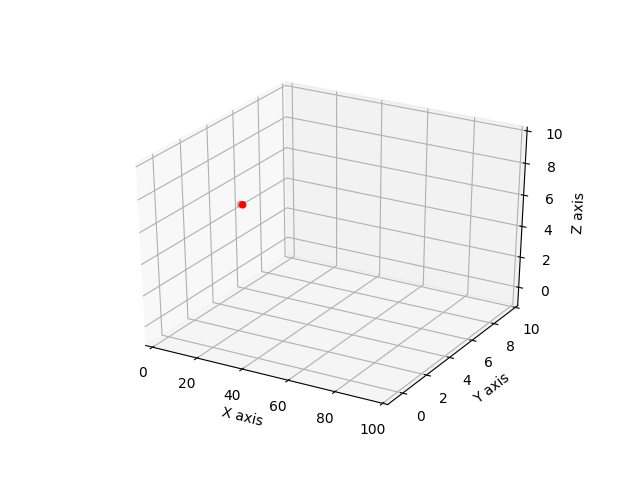

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


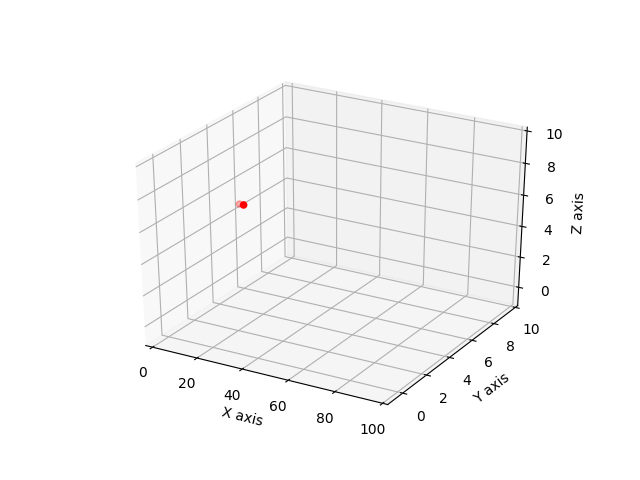

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


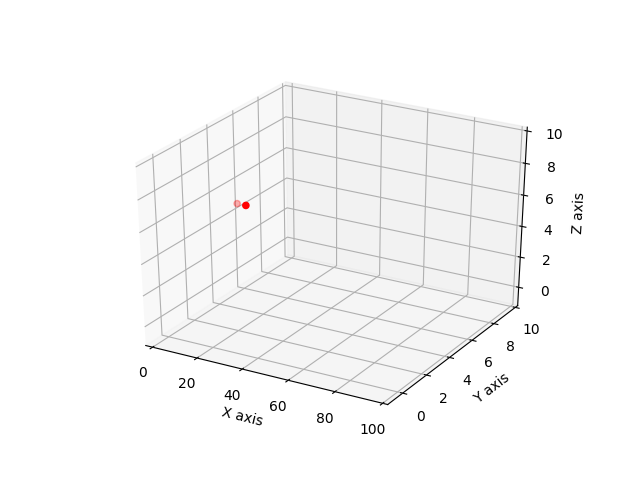

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


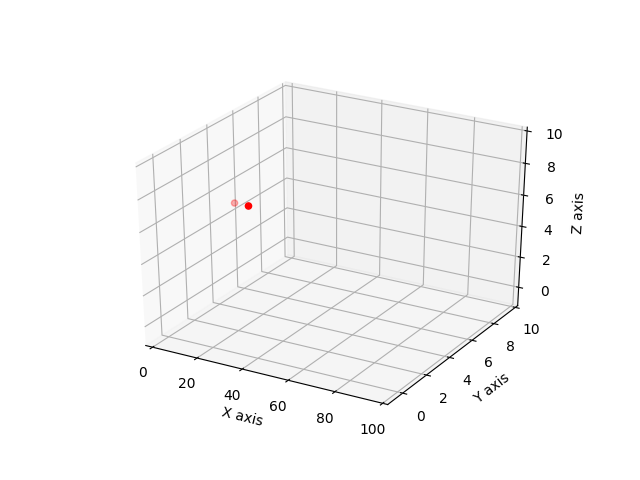

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


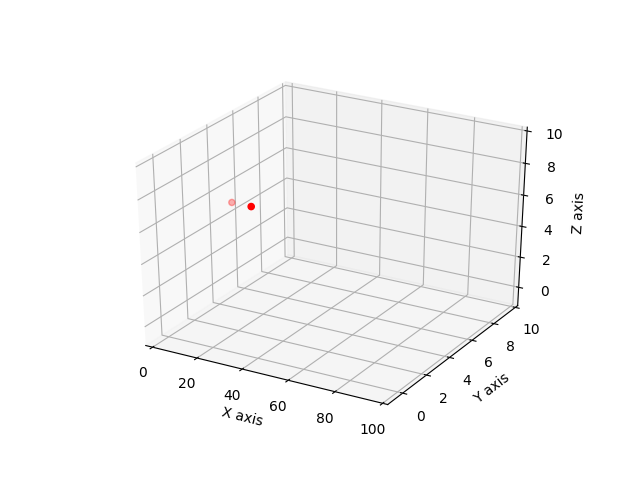

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


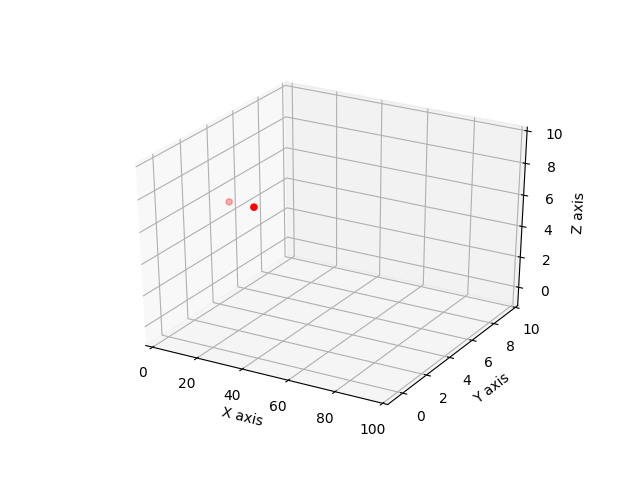

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


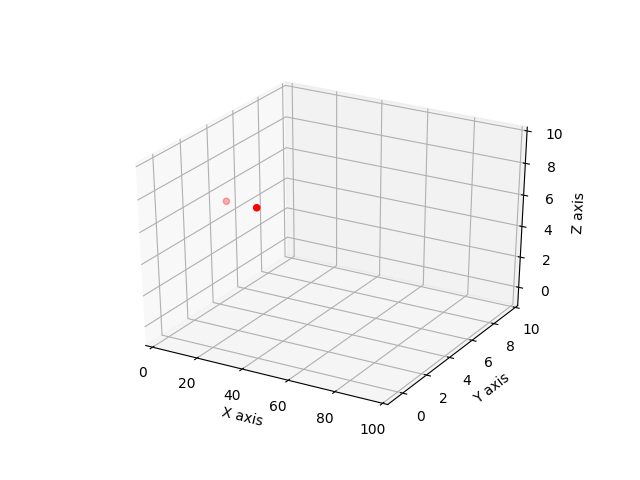

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


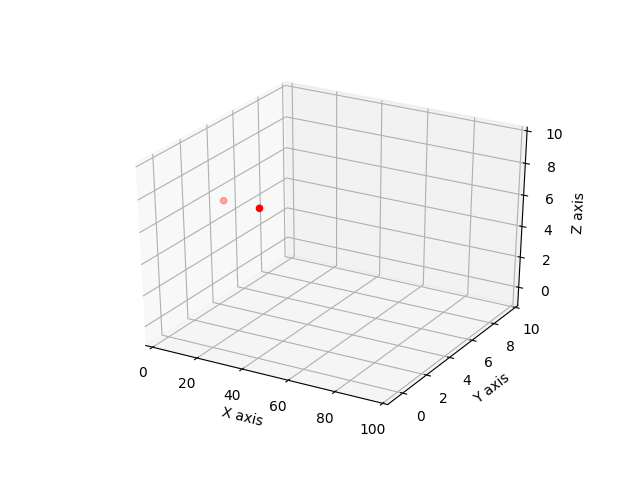

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


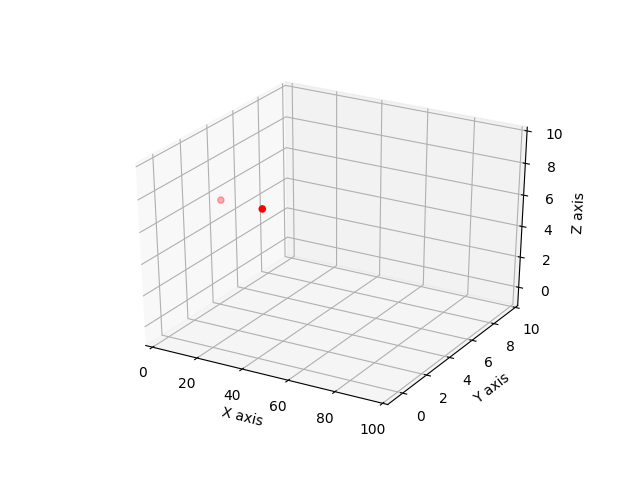

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


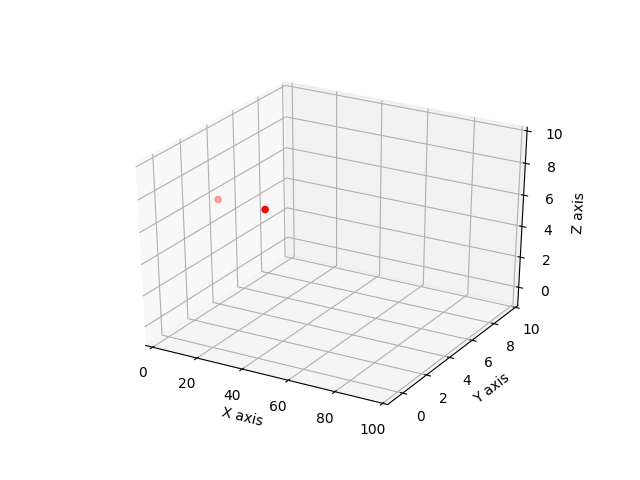

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


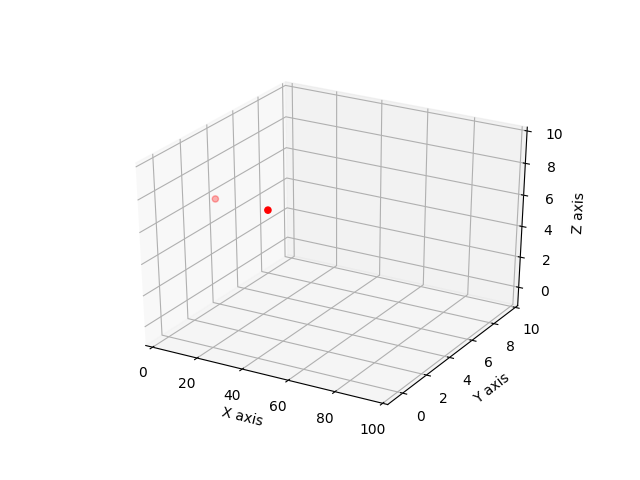

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


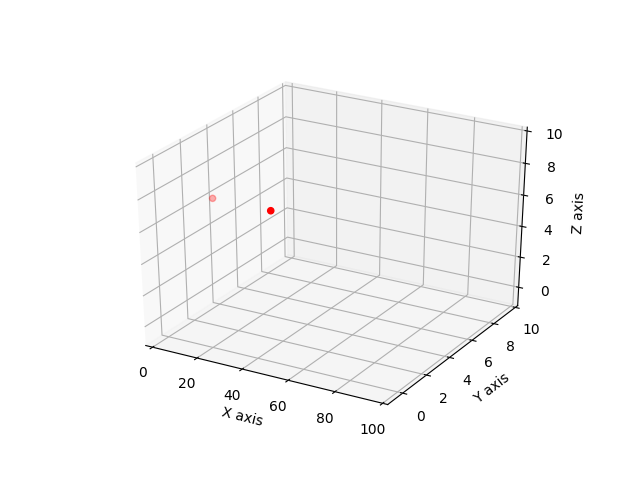

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


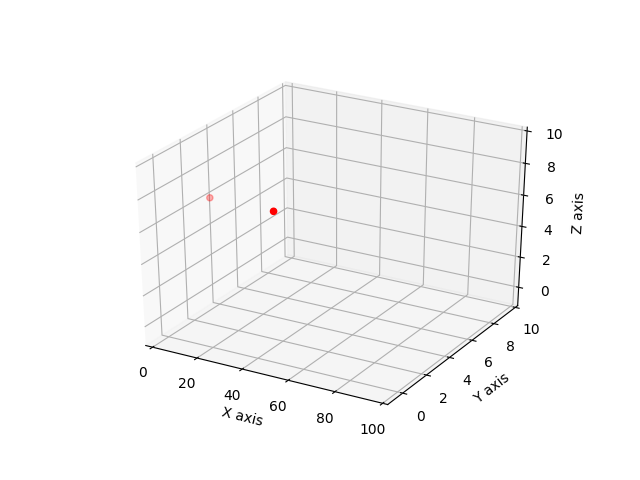

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


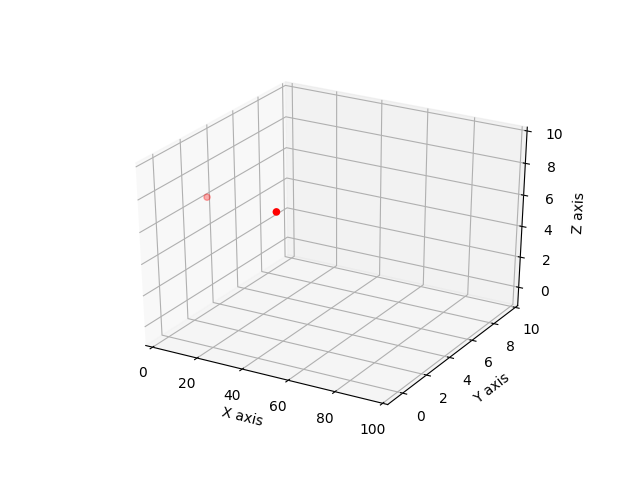

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


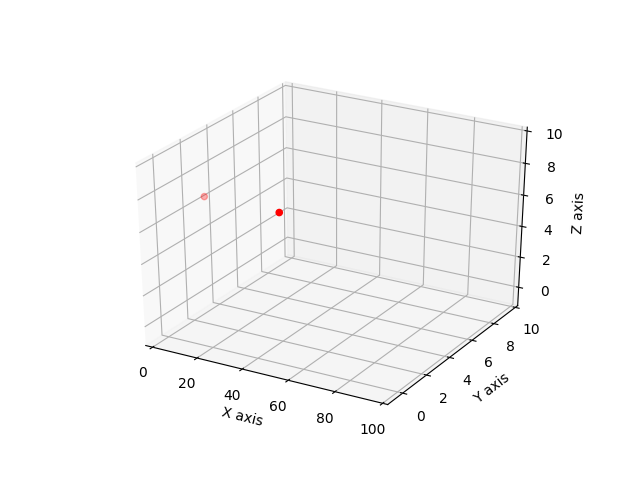

shape = 3
this is the grid layout


<IPython.core.display.Javascript object>


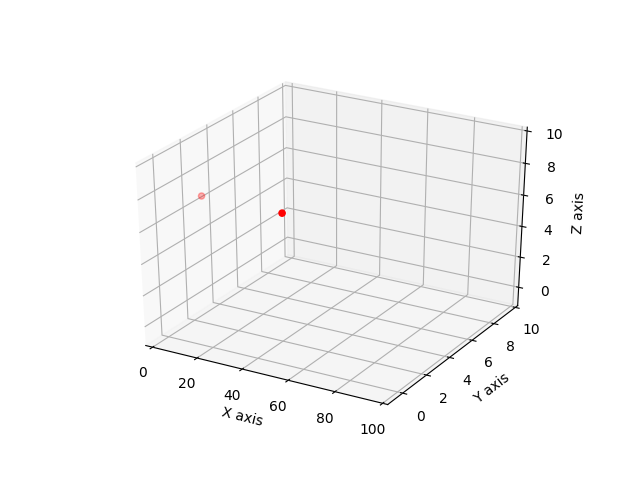

shape = 3


()

In [15]:
#%timeit
plasma_charge_2E()

In [16]:
def plasma_random_Charges(print_all=False):
    time_L = 6
    delta_t = .1
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[5,5,5],  # this is the size of the grid in meters
                time=time_L,  # this is the length of a simulation in secounds
                delta_t=delta_t,  # this is the size of a full time step
                constant_E=[0,0,0],
                constant_H=[0,0,0]
        )
    A = 2
    for i in range(A):
        for j in range(A):
            for k in range(A):
                location = [10 / A * i, 10 / A * j, 10 / A * k]
                print(location)
                mapping.Add_Charge(location, Q = .00001, velocity=[0,0,0], acceleration=[0,0,0], mass=1)
    
    print('simulation starting')
    #jefimenko.simulate(mapping)
    jefimenko.plasma_simulation(mapping)
    #jefimenko.simulate(mapping)
    for time in range(int(time_L / delta_t)):
        jefimenko.plot_grid(mapping, time)
        #jefimenko.plot_EM_grid('E', mapping, time)
        #jefimenko.plot_EM_grid('H', mapping, time)
        print('simulation time is ' + str(time))
        for i in range(len(mapping.charges[time])):
            print(mapping.charges[time][i].location)
    return()

[0.0, 0.0, 0.0]
[0.0, 0.0, 5.0]
[0.0, 5.0, 0.0]
[0.0, 5.0, 5.0]
[5.0, 0.0, 0.0]
[5.0, 0.0, 5.0]
[5.0, 5.0, 0.0]
[5.0, 5.0, 5.0]
simulation starting
grid simulated in 2.21962571144104 seconds

this is the grid layout


<IPython.core.display.Javascript object>


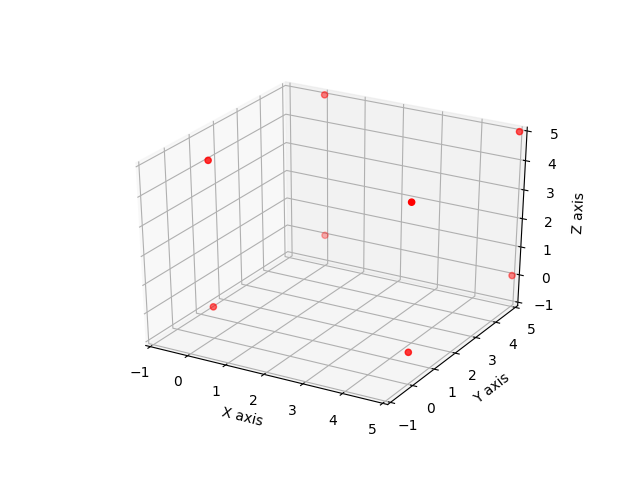

shape = 3
simulation time is 0
[0. 0. 0.]
[0. 0. 5.]
[0. 5. 0.]
[0. 5. 5.]
[5. 0. 0.]
[5. 0. 5.]
[5. 5. 0.]
[5. 5. 5.]
this is the grid layout


<IPython.core.display.Javascript object>


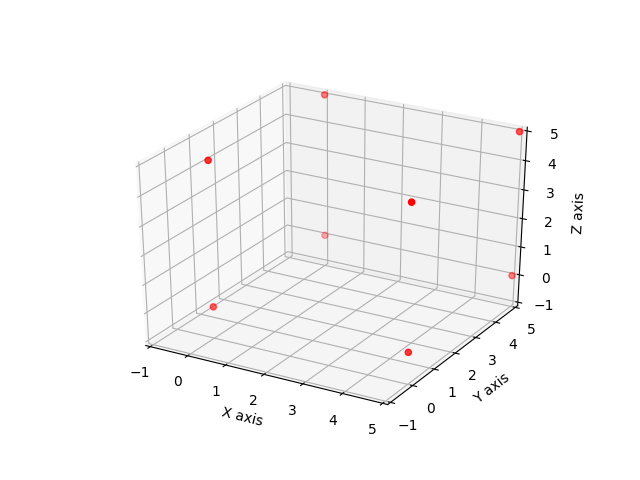

shape = 3
simulation time is 1
[-0.00034145 -0.00034145 -0.00034145]
[-3.41447315e-04 -3.41447315e-04  5.00034145e+00]
[-3.41447315e-04  5.00034145e+00 -3.41447315e-04]
[-3.41447315e-04  5.00034145e+00  5.00034145e+00]
[ 5.00034145e+00 -3.41447315e-04 -3.41447315e-04]
[ 5.00034145e+00 -3.41447315e-04  5.00034145e+00]
[ 5.00034145e+00  5.00034145e+00 -3.41447315e-04]
[5.00034145 5.00034145 5.00034145]
this is the grid layout


<IPython.core.display.Javascript object>


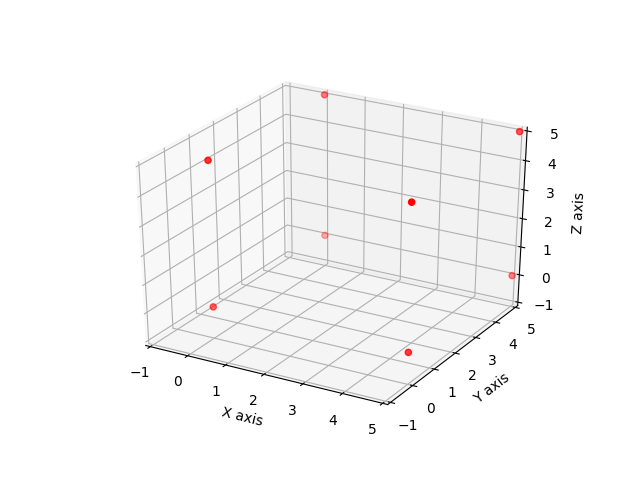

shape = 3
simulation time is 2
[-0.0013657 -0.0013657 -0.0013657]
[-1.36569601e-03 -1.36569601e-03  5.00136570e+00]
[-1.36569601e-03  5.00136570e+00 -1.36569601e-03]
[-1.36569601e-03  5.00136570e+00  5.00136570e+00]
[ 5.00136570e+00 -1.36569601e-03 -1.36569601e-03]
[ 5.00136570e+00 -1.36569601e-03  5.00136570e+00]
[ 5.00136570e+00  5.00136570e+00 -1.36569601e-03]
[5.0013657 5.0013657 5.0013657]
this is the grid layout


<IPython.core.display.Javascript object>


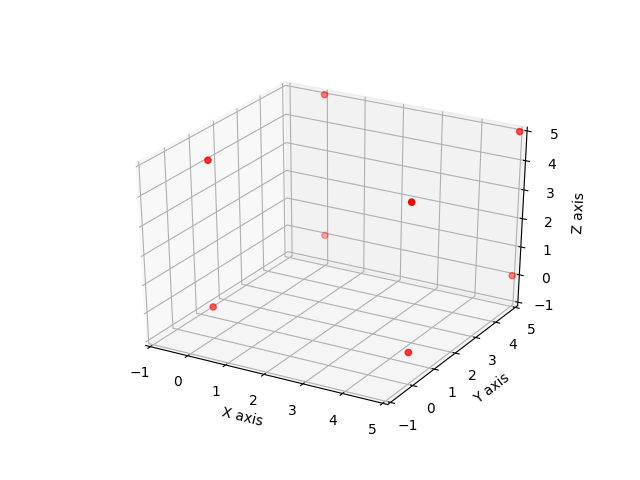

shape = 3
simulation time is 3
[-0.00307237 -0.00307237 -0.00307237]
[-3.07237334e-03 -3.07237334e-03  5.00307237e+00]
[-3.07237334e-03  5.00307237e+00 -3.07237334e-03]
[-3.07237334e-03  5.00307237e+00  5.00307237e+00]
[ 5.00307237e+00 -3.07237334e-03 -3.07237334e-03]
[ 5.00307237e+00 -3.07237334e-03  5.00307237e+00]
[ 5.00307237e+00  5.00307237e+00 -3.07237334e-03]
[5.00307237 5.00307237 5.00307237]
this is the grid layout


/home/storage/nehemiah/Nehemiah/linux/programing/jefimenko/git/optimized plasma/Jefimenko/jefimenko/graphing.py:156: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


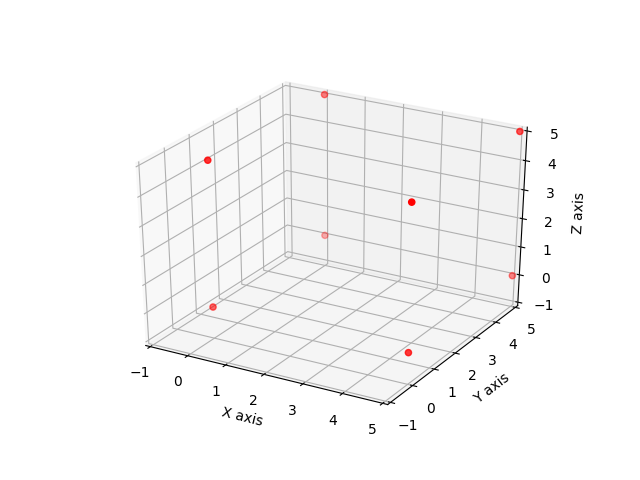

shape = 3
simulation time is 4
[-0.00546073 -0.00546073 -0.00546073]
[-0.00546073 -0.00546073  5.00546073]
[-0.00546073  5.00546073 -0.00546073]
[-0.00546073  5.00546073  5.00546073]
[ 5.00546073 -0.00546073 -0.00546073]
[ 5.00546073 -0.00546073  5.00546073]
[ 5.00546073  5.00546073 -0.00546073]
[5.00546073 5.00546073 5.00546073]
this is the grid layout


<IPython.core.display.Javascript object>


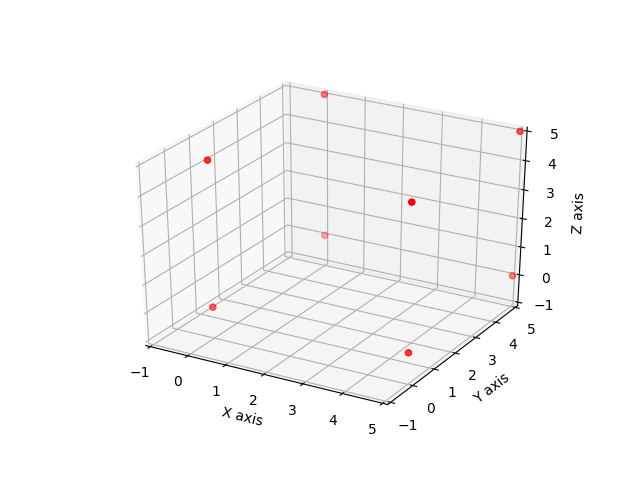

shape = 3
simulation time is 5
[-0.00852967 -0.00852967 -0.00852967]
[-0.00852967 -0.00852967  5.00852967]
[-0.00852967  5.00852967 -0.00852967]
[-0.00852967  5.00852967  5.00852967]
[ 5.00852967 -0.00852967 -0.00852967]
[ 5.00852967 -0.00852967  5.00852967]
[ 5.00852967  5.00852967 -0.00852967]
[5.00852967 5.00852967 5.00852967]
this is the grid layout


<IPython.core.display.Javascript object>


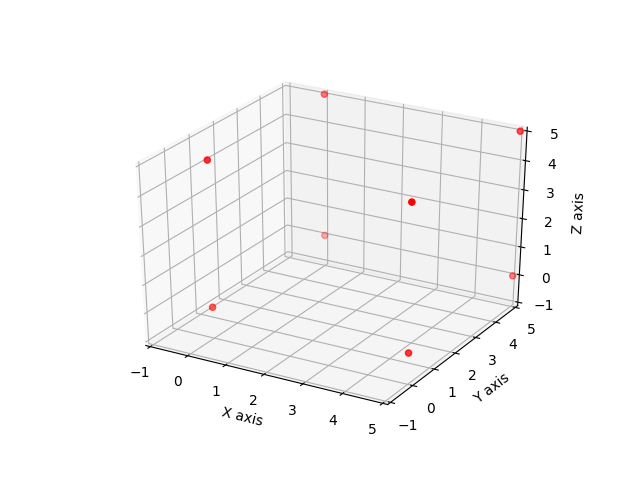

shape = 3
simulation time is 6
[-0.01227769 -0.01227769 -0.01227769]
[-0.01227769 -0.01227769  5.01227769]
[-0.01227769  5.01227769 -0.01227769]
[-0.01227769  5.01227769  5.01227769]
[ 5.01227769 -0.01227769 -0.01227769]
[ 5.01227769 -0.01227769  5.01227769]
[ 5.01227769  5.01227769 -0.01227769]
[5.01227769 5.01227769 5.01227769]
this is the grid layout


<IPython.core.display.Javascript object>


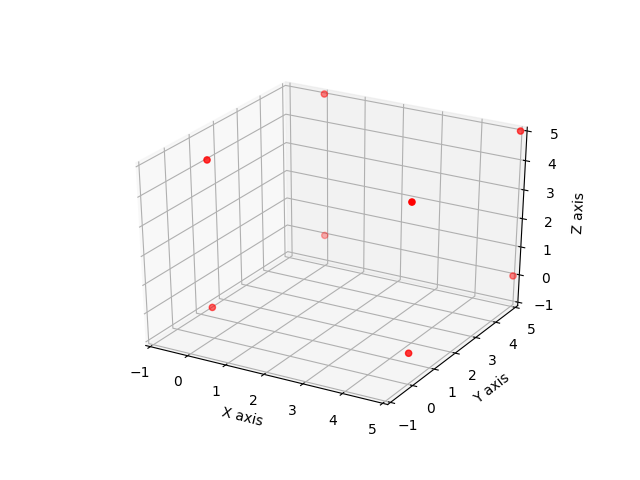

shape = 3
simulation time is 7
[-0.01670296 -0.01670296 -0.01670296]
[-0.01670296 -0.01670296  5.01670296]
[-0.01670296  5.01670296 -0.01670296]
[-0.01670296  5.01670296  5.01670296]
[ 5.01670296 -0.01670296 -0.01670296]
[ 5.01670296 -0.01670296  5.01670296]
[ 5.01670296  5.01670296 -0.01670296]
[5.01670296 5.01670296 5.01670296]
this is the grid layout


<IPython.core.display.Javascript object>


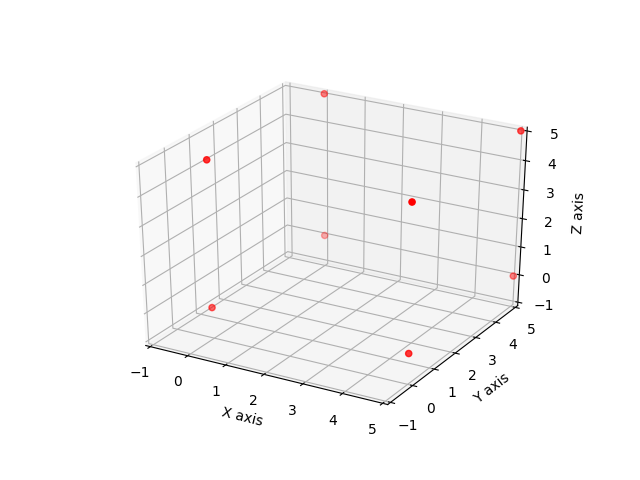

shape = 3
simulation time is 8
[-0.02180327 -0.02180327 -0.02180327]
[-0.02180327 -0.02180327  5.02180327]
[-0.02180327  5.02180327 -0.02180327]
[-0.02180327  5.02180327  5.02180327]
[ 5.02180327 -0.02180327 -0.02180327]
[ 5.02180327 -0.02180327  5.02180327]
[ 5.02180327  5.02180327 -0.02180327]
[5.02180327 5.02180327 5.02180327]
this is the grid layout


<IPython.core.display.Javascript object>


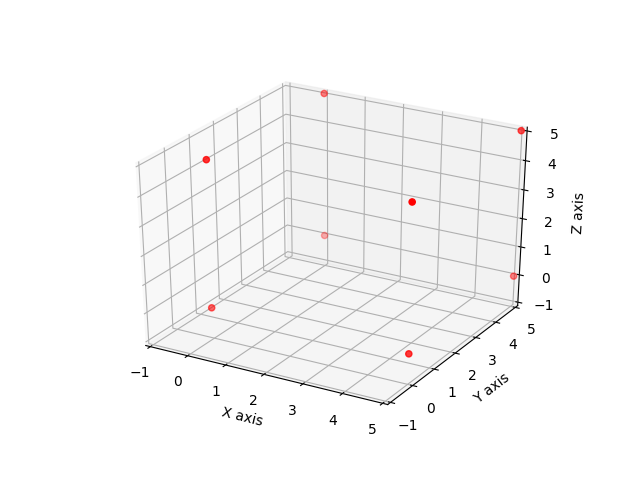

shape = 3
simulation time is 9
[-0.02757609 -0.02757609 -0.02757609]
[-0.02757609 -0.02757609  5.02757609]
[-0.02757609  5.02757609 -0.02757609]
[-0.02757609  5.02757609  5.02757609]
[ 5.02757609 -0.02757609 -0.02757609]
[ 5.02757609 -0.02757609  5.02757609]
[ 5.02757609  5.02757609 -0.02757609]
[5.02757609 5.02757609 5.02757609]
this is the grid layout


<IPython.core.display.Javascript object>


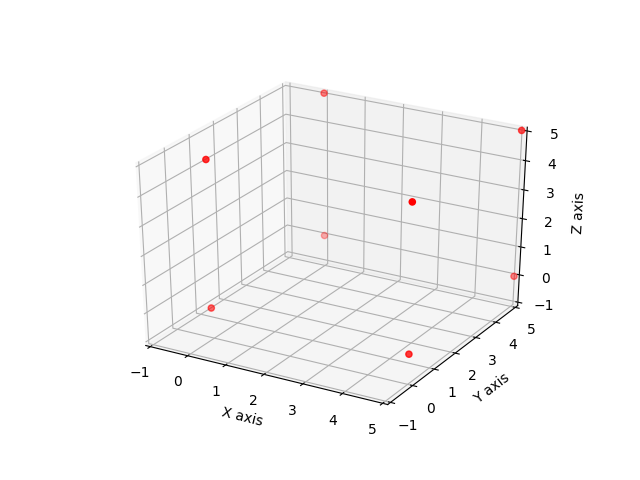

shape = 3
simulation time is 10
[-0.03401851 -0.03401851 -0.03401851]
[-0.03401851 -0.03401851  5.03401851]
[-0.03401851  5.03401851 -0.03401851]
[-0.03401851  5.03401851  5.03401851]
[ 5.03401851 -0.03401851 -0.03401851]
[ 5.03401851 -0.03401851  5.03401851]
[ 5.03401851  5.03401851 -0.03401851]
[5.03401851 5.03401851 5.03401851]
this is the grid layout


<IPython.core.display.Javascript object>


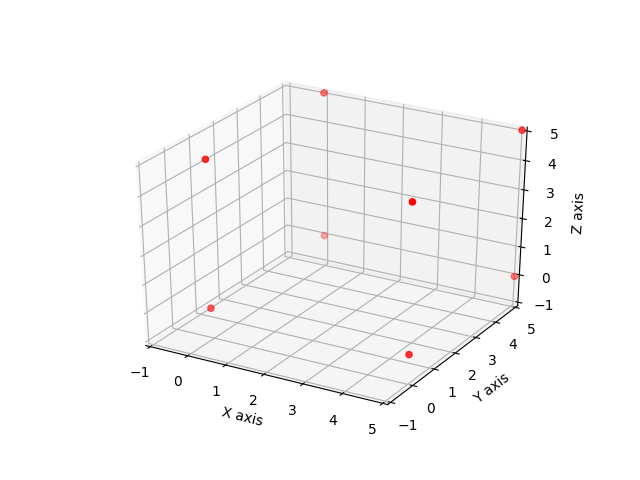

shape = 3
simulation time is 11
[-0.04112731 -0.04112731 -0.04112731]
[-0.04112731 -0.04112731  5.04112731]
[-0.04112731  5.04112731 -0.04112731]
[-0.04112731  5.04112731  5.04112731]
[ 5.04112731 -0.04112731 -0.04112731]
[ 5.04112731 -0.04112731  5.04112731]
[ 5.04112731  5.04112731 -0.04112731]
[5.04112731 5.04112731 5.04112731]
this is the grid layout


<IPython.core.display.Javascript object>


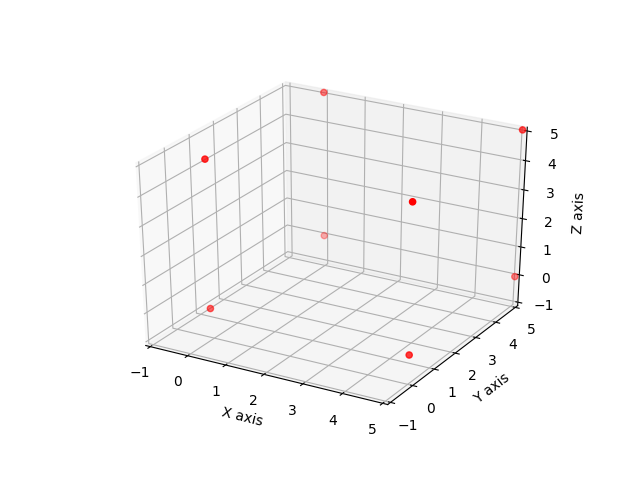

shape = 3
simulation time is 12
[-0.04889894 -0.04889894 -0.04889894]
[-0.04889894 -0.04889894  5.04889894]
[-0.04889894  5.04889894 -0.04889894]
[-0.04889894  5.04889894  5.04889894]
[ 5.04889894 -0.04889894 -0.04889894]
[ 5.04889894 -0.04889894  5.04889894]
[ 5.04889894  5.04889894 -0.04889894]
[5.04889894 5.04889894 5.04889894]
this is the grid layout


<IPython.core.display.Javascript object>


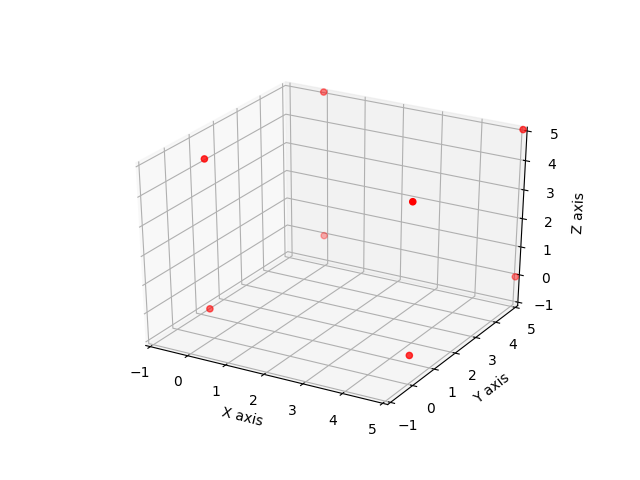

shape = 3
simulation time is 13
[-0.05732952 -0.05732952 -0.05732952]
[-0.05732952 -0.05732952  5.05732952]
[-0.05732952  5.05732952 -0.05732952]
[-0.05732952  5.05732952  5.05732952]
[ 5.05732952 -0.05732952 -0.05732952]
[ 5.05732952 -0.05732952  5.05732952]
[ 5.05732952  5.05732952 -0.05732952]
[5.05732952 5.05732952 5.05732952]
this is the grid layout


<IPython.core.display.Javascript object>


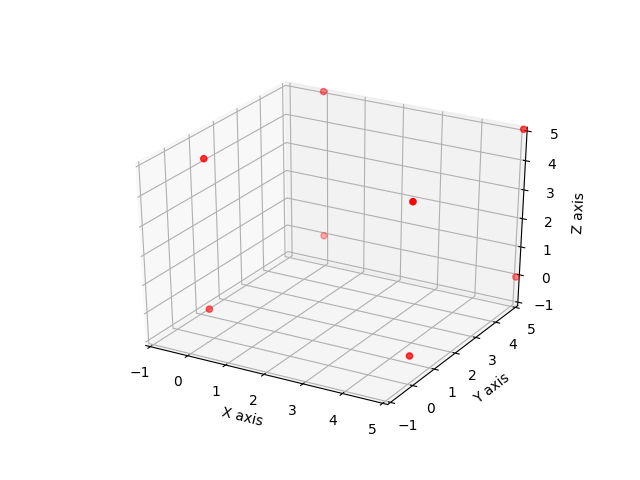

shape = 3
simulation time is 14
[-0.06641488 -0.06641488 -0.06641488]
[-0.06641488 -0.06641488  5.06641488]
[-0.06641488  5.06641488 -0.06641488]
[-0.06641488  5.06641488  5.06641488]
[ 5.06641488 -0.06641488 -0.06641488]
[ 5.06641488 -0.06641488  5.06641488]
[ 5.06641488  5.06641488 -0.06641488]
[5.06641488 5.06641488 5.06641488]
this is the grid layout


<IPython.core.display.Javascript object>


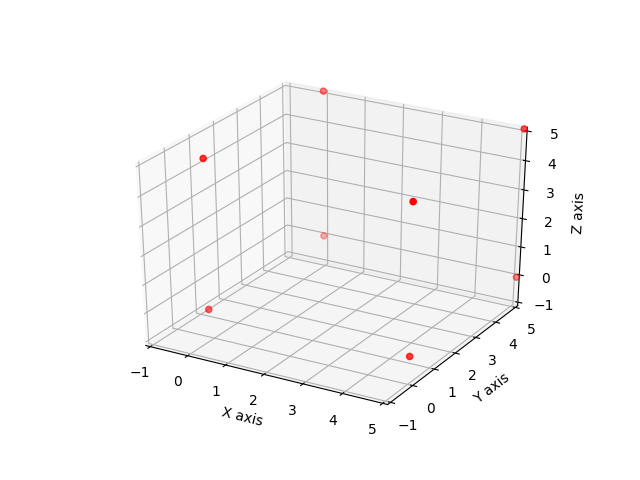

shape = 3
simulation time is 15
[-0.07615056 -0.07615056 -0.07615056]
[-0.07615056 -0.07615056  5.07615056]
[-0.07615056  5.07615056 -0.07615056]
[-0.07615056  5.07615056  5.07615056]
[ 5.07615056 -0.07615056 -0.07615056]
[ 5.07615056 -0.07615056  5.07615056]
[ 5.07615056  5.07615056 -0.07615056]
[5.07615056 5.07615056 5.07615056]
this is the grid layout


<IPython.core.display.Javascript object>


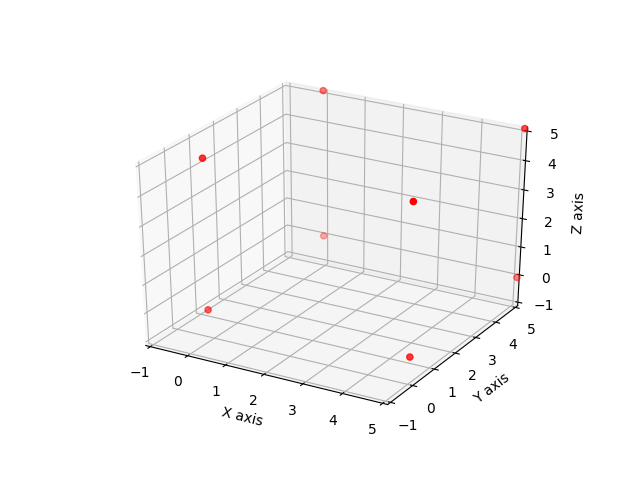

shape = 3
simulation time is 16
[-0.0865318 -0.0865318 -0.0865318]
[-0.0865318 -0.0865318  5.0865318]
[-0.0865318  5.0865318 -0.0865318]
[-0.0865318  5.0865318  5.0865318]
[ 5.0865318 -0.0865318 -0.0865318]
[ 5.0865318 -0.0865318  5.0865318]
[ 5.0865318  5.0865318 -0.0865318]
[5.0865318 5.0865318 5.0865318]
this is the grid layout


<IPython.core.display.Javascript object>


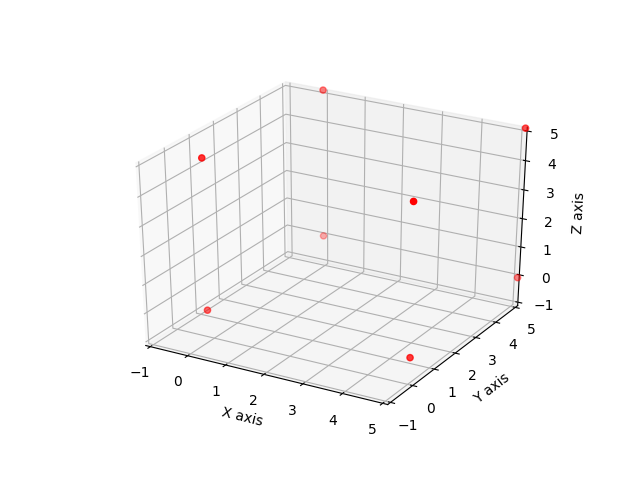

shape = 3
simulation time is 17
[-0.09755359 -0.09755359 -0.09755359]
[-0.09755359 -0.09755359  5.09755359]
[-0.09755359  5.09755359 -0.09755359]
[-0.09755359  5.09755359  5.09755359]
[ 5.09755359 -0.09755359 -0.09755359]
[ 5.09755359 -0.09755359  5.09755359]
[ 5.09755359  5.09755359 -0.09755359]
[5.09755359 5.09755359 5.09755359]
this is the grid layout


<IPython.core.display.Javascript object>


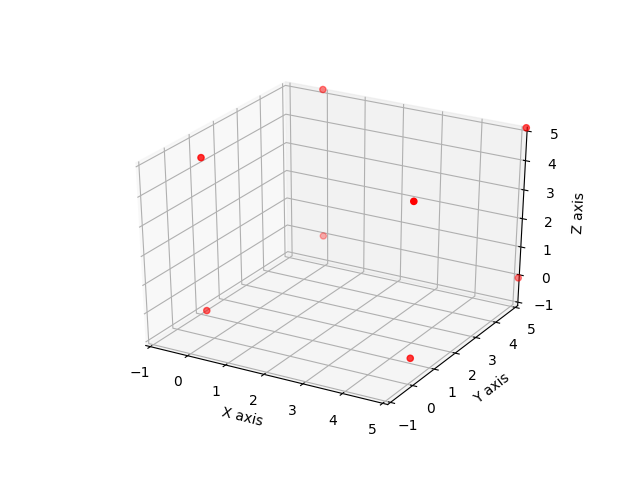

shape = 3
simulation time is 18
[-0.10921064 -0.10921064 -0.10921064]
[-0.10921064 -0.10921064  5.10921064]
[-0.10921064  5.10921064 -0.10921064]
[-0.10921064  5.10921064  5.10921064]
[ 5.10921064 -0.10921064 -0.10921064]
[ 5.10921064 -0.10921064  5.10921064]
[ 5.10921064  5.10921064 -0.10921064]
[5.10921064 5.10921064 5.10921064]
this is the grid layout


<IPython.core.display.Javascript object>


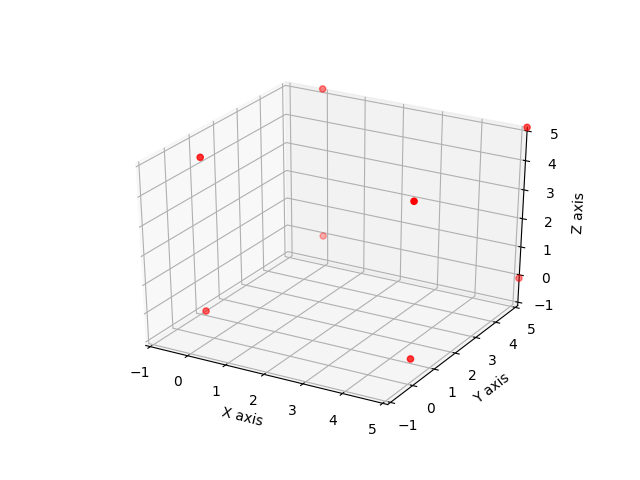

shape = 3
simulation time is 19
[-0.12149743 -0.12149743 -0.12149743]
[-0.12149743 -0.12149743  5.12149743]
[-0.12149743  5.12149743 -0.12149743]
[-0.12149743  5.12149743  5.12149743]
[ 5.12149743 -0.12149743 -0.12149743]
[ 5.12149743 -0.12149743  5.12149743]
[ 5.12149743  5.12149743 -0.12149743]
[5.12149743 5.12149743 5.12149743]
this is the grid layout


<IPython.core.display.Javascript object>


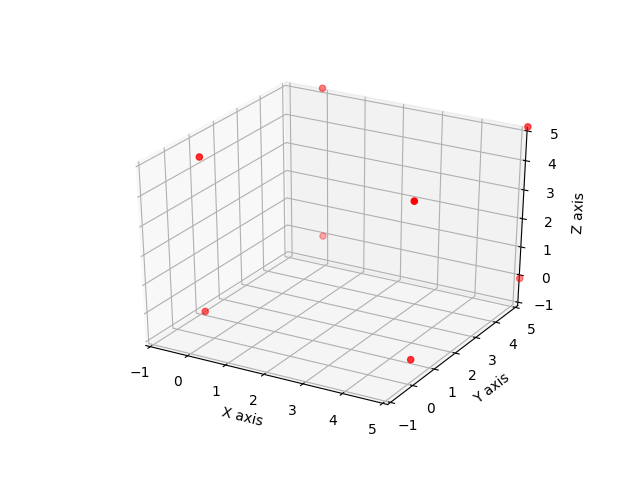

shape = 3
simulation time is 20
[-0.13440822 -0.13440822 -0.13440822]
[-0.13440822 -0.13440822  5.13440822]
[-0.13440822  5.13440822 -0.13440822]
[-0.13440822  5.13440822  5.13440822]
[ 5.13440822 -0.13440822 -0.13440822]
[ 5.13440822 -0.13440822  5.13440822]
[ 5.13440822  5.13440822 -0.13440822]
[5.13440822 5.13440822 5.13440822]
this is the grid layout


<IPython.core.display.Javascript object>


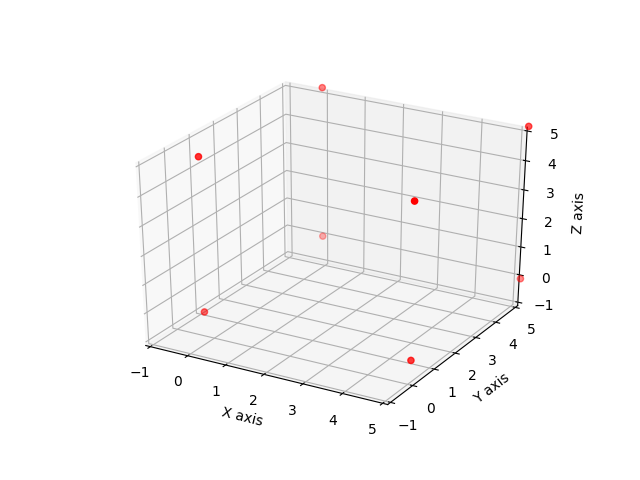

shape = 3
simulation time is 21
[-0.14793703 -0.14793703 -0.14793703]
[-0.14793703 -0.14793703  5.14793703]
[-0.14793703  5.14793703 -0.14793703]
[-0.14793703  5.14793703  5.14793703]
[ 5.14793703 -0.14793703 -0.14793703]
[ 5.14793703 -0.14793703  5.14793703]
[ 5.14793703  5.14793703 -0.14793703]
[5.14793703 5.14793703 5.14793703]
this is the grid layout


<IPython.core.display.Javascript object>


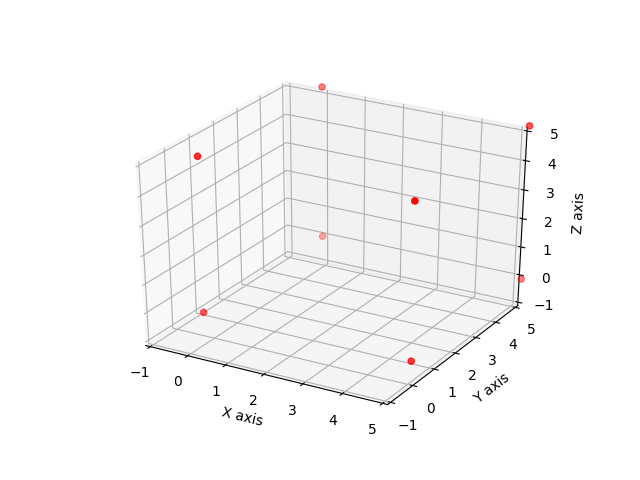

shape = 3
simulation time is 22
[-0.1620777 -0.1620777 -0.1620777]
[-0.1620777 -0.1620777  5.1620777]
[-0.1620777  5.1620777 -0.1620777]
[-0.1620777  5.1620777  5.1620777]
[ 5.1620777 -0.1620777 -0.1620777]
[ 5.1620777 -0.1620777  5.1620777]
[ 5.1620777  5.1620777 -0.1620777]
[5.1620777 5.1620777 5.1620777]
this is the grid layout


<IPython.core.display.Javascript object>


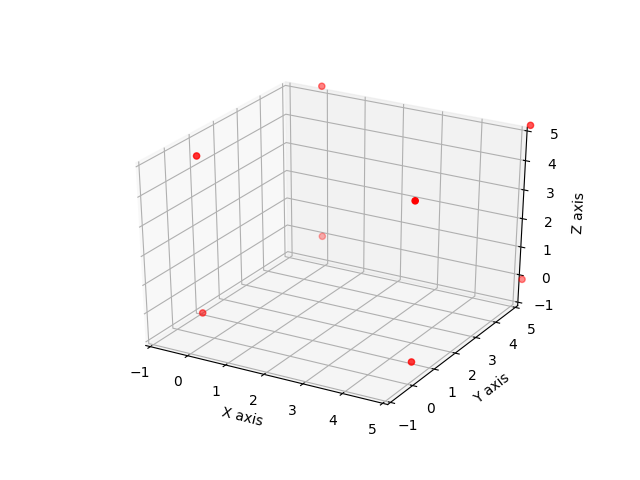

shape = 3
simulation time is 23
[-0.17682387 -0.17682387 -0.17682387]
[-0.17682387 -0.17682387  5.17682387]
[-0.17682387  5.17682387 -0.17682387]
[-0.17682387  5.17682387  5.17682387]
[ 5.17682387 -0.17682387 -0.17682387]
[ 5.17682387 -0.17682387  5.17682387]
[ 5.17682387  5.17682387 -0.17682387]
[5.17682387 5.17682387 5.17682387]
this is the grid layout


<IPython.core.display.Javascript object>


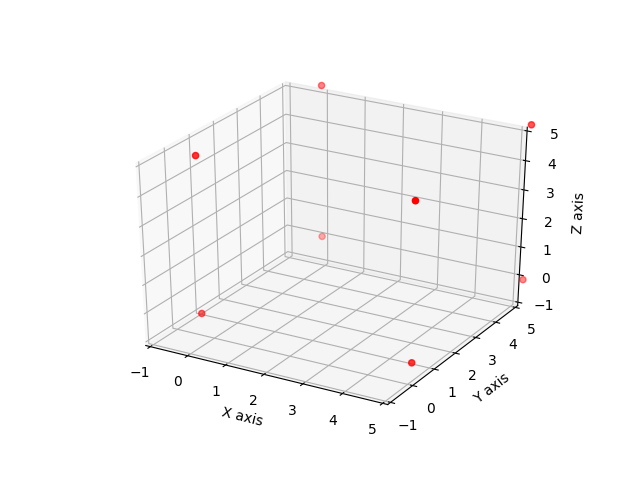

shape = 3
simulation time is 24
[-0.19216899 -0.19216899 -0.19216899]
[-0.19216899 -0.19216899  5.19216899]
[-0.19216899  5.19216899 -0.19216899]
[-0.19216899  5.19216899  5.19216899]
[ 5.19216899 -0.19216899 -0.19216899]
[ 5.19216899 -0.19216899  5.19216899]
[ 5.19216899  5.19216899 -0.19216899]
[5.19216899 5.19216899 5.19216899]
this is the grid layout


<IPython.core.display.Javascript object>


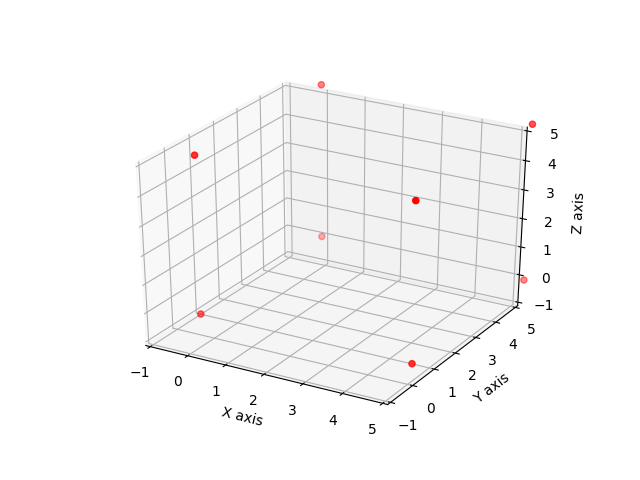

shape = 3
simulation time is 25
[-0.20810639 -0.20810639 -0.20810639]
[-0.20810639 -0.20810639  5.20810639]
[-0.20810639  5.20810639 -0.20810639]
[-0.20810639  5.20810639  5.20810639]
[ 5.20810639 -0.20810639 -0.20810639]
[ 5.20810639 -0.20810639  5.20810639]
[ 5.20810639  5.20810639 -0.20810639]
[5.20810639 5.20810639 5.20810639]
this is the grid layout


<IPython.core.display.Javascript object>


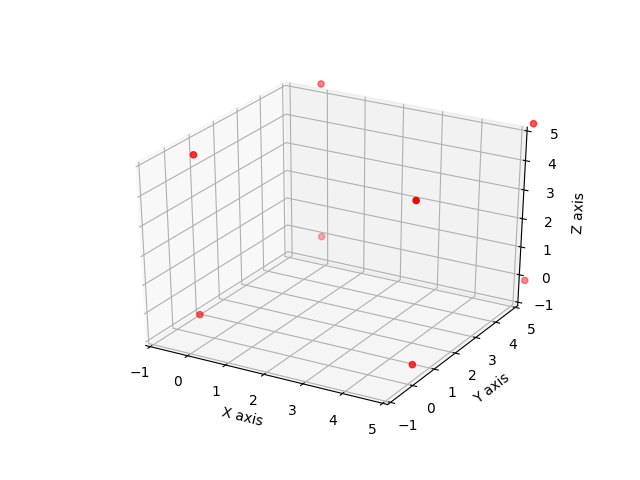

shape = 3
simulation time is 26
[-0.22462921 -0.22462921 -0.22462921]
[-0.22462921 -0.22462921  5.22462921]
[-0.22462921  5.22462921 -0.22462921]
[-0.22462921  5.22462921  5.22462921]
[ 5.22462921 -0.22462921 -0.22462921]
[ 5.22462921 -0.22462921  5.22462921]
[ 5.22462921  5.22462921 -0.22462921]
[5.22462921 5.22462921 5.22462921]
this is the grid layout


<IPython.core.display.Javascript object>


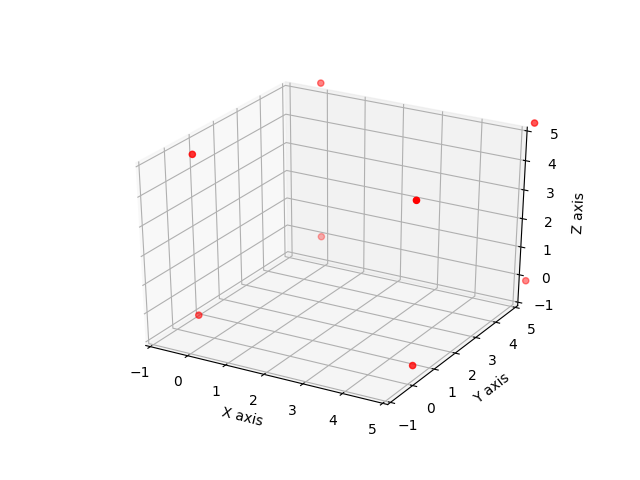

shape = 3
simulation time is 27
[-0.24173049 -0.24173049 -0.24173049]
[-0.24173049 -0.24173049  5.24173049]
[-0.24173049  5.24173049 -0.24173049]
[-0.24173049  5.24173049  5.24173049]
[ 5.24173049 -0.24173049 -0.24173049]
[ 5.24173049 -0.24173049  5.24173049]
[ 5.24173049  5.24173049 -0.24173049]
[5.24173049 5.24173049 5.24173049]
this is the grid layout


<IPython.core.display.Javascript object>


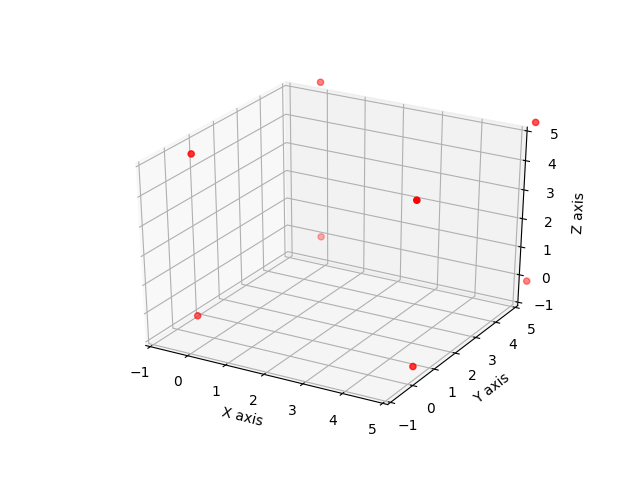

shape = 3
simulation time is 28
[-0.25940313 -0.25940313 -0.25940313]
[-0.25940313 -0.25940313  5.25940313]
[-0.25940313  5.25940313 -0.25940313]
[-0.25940313  5.25940313  5.25940313]
[ 5.25940313 -0.25940313 -0.25940313]
[ 5.25940313 -0.25940313  5.25940313]
[ 5.25940313  5.25940313 -0.25940313]
[5.25940313 5.25940313 5.25940313]
this is the grid layout


<IPython.core.display.Javascript object>


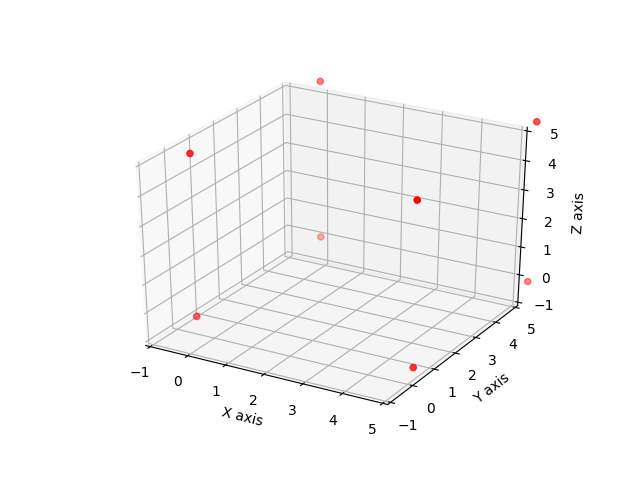

shape = 3
simulation time is 29
[-0.27763993 -0.27763993 -0.27763993]
[-0.27763993 -0.27763993  5.27763993]
[-0.27763993  5.27763993 -0.27763993]
[-0.27763993  5.27763993  5.27763993]
[ 5.27763993 -0.27763993 -0.27763993]
[ 5.27763993 -0.27763993  5.27763993]
[ 5.27763993  5.27763993 -0.27763993]
[5.27763993 5.27763993 5.27763993]
this is the grid layout


<IPython.core.display.Javascript object>


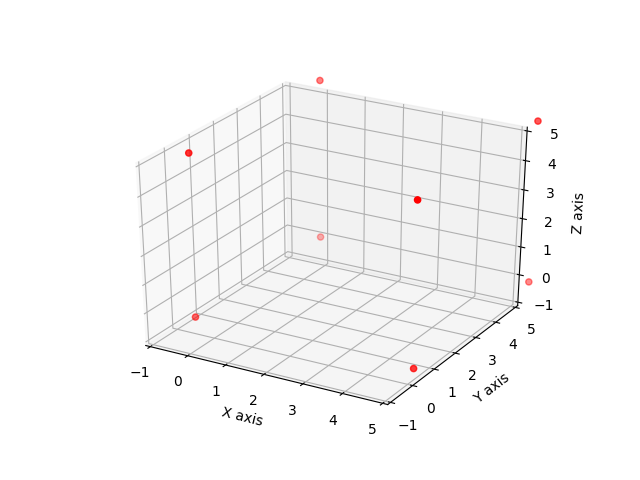

shape = 3
simulation time is 30
[-0.29643359 -0.29643359 -0.29643359]
[-0.29643359 -0.29643359  5.29643359]
[-0.29643359  5.29643359 -0.29643359]
[-0.29643359  5.29643359  5.29643359]
[ 5.29643359 -0.29643359 -0.29643359]
[ 5.29643359 -0.29643359  5.29643359]
[ 5.29643359  5.29643359 -0.29643359]
[5.29643359 5.29643359 5.29643359]
this is the grid layout


<IPython.core.display.Javascript object>


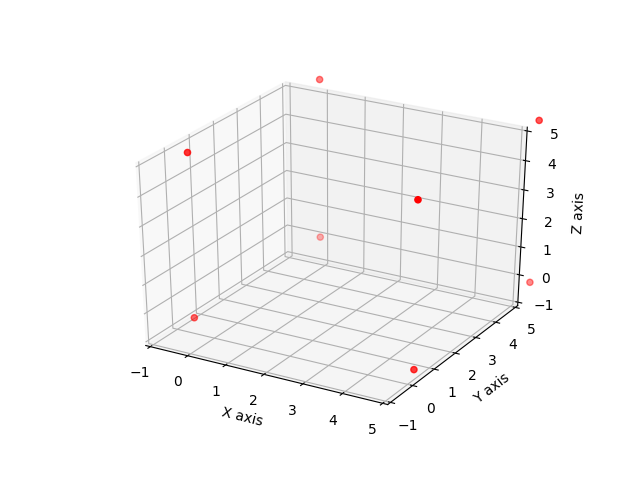

shape = 3
simulation time is 31
[-0.31577675 -0.31577675 -0.31577675]
[-0.31577675 -0.31577675  5.31577675]
[-0.31577675  5.31577675 -0.31577675]
[-0.31577675  5.31577675  5.31577675]
[ 5.31577675 -0.31577675 -0.31577675]
[ 5.31577675 -0.31577675  5.31577675]
[ 5.31577675  5.31577675 -0.31577675]
[5.31577675 5.31577675 5.31577675]
this is the grid layout


<IPython.core.display.Javascript object>


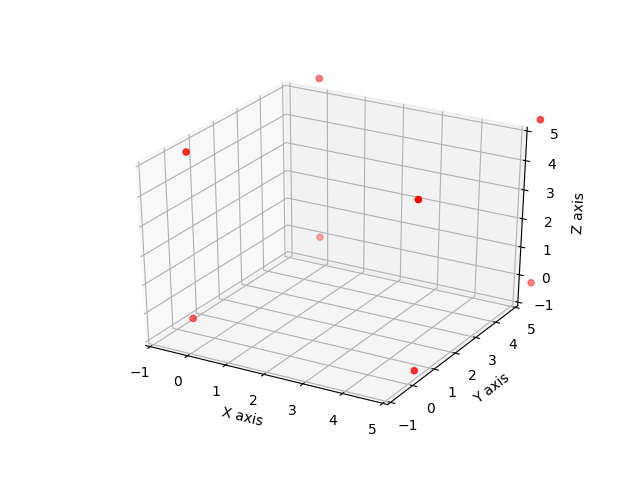

shape = 3
simulation time is 32
[-0.33566196 -0.33566196 -0.33566196]
[-0.33566196 -0.33566196  5.33566196]
[-0.33566196  5.33566196 -0.33566196]
[-0.33566196  5.33566196  5.33566196]
[ 5.33566196 -0.33566196 -0.33566196]
[ 5.33566196 -0.33566196  5.33566196]
[ 5.33566196  5.33566196 -0.33566196]
[5.33566196 5.33566196 5.33566196]
this is the grid layout


<IPython.core.display.Javascript object>


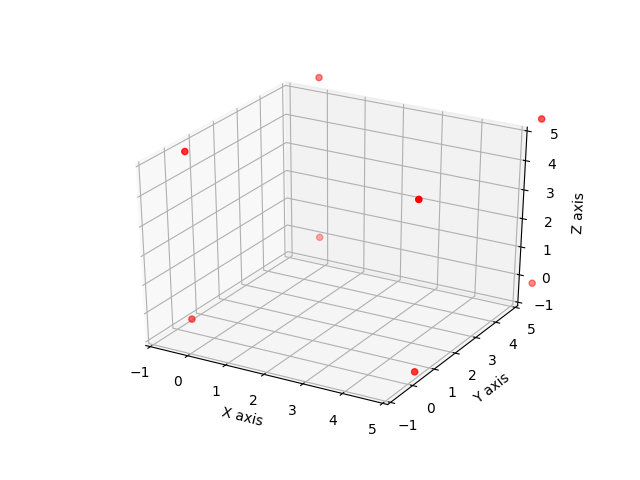

shape = 3
simulation time is 33
[-0.35608173 -0.35608173 -0.35608173]
[-0.35608173 -0.35608173  5.35608173]
[-0.35608173  5.35608173 -0.35608173]
[-0.35608173  5.35608173  5.35608173]
[ 5.35608173 -0.35608173 -0.35608173]
[ 5.35608173 -0.35608173  5.35608173]
[ 5.35608173  5.35608173 -0.35608173]
[5.35608173 5.35608173 5.35608173]
this is the grid layout


<IPython.core.display.Javascript object>


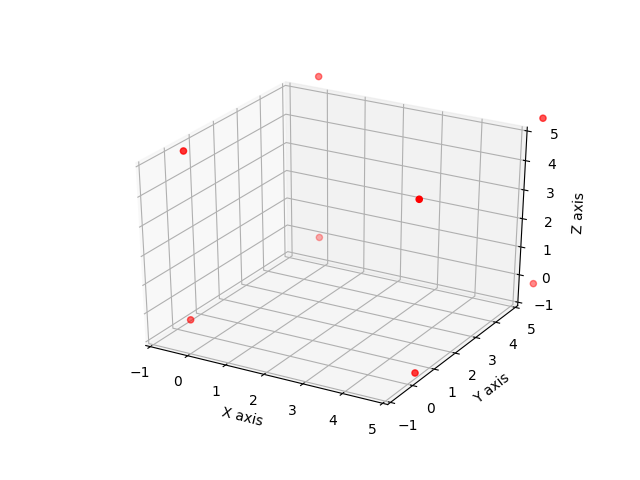

shape = 3
simulation time is 34
[-0.37702851 -0.37702851 -0.37702851]
[-0.37702851 -0.37702851  5.37702851]
[-0.37702851  5.37702851 -0.37702851]
[-0.37702851  5.37702851  5.37702851]
[ 5.37702851 -0.37702851 -0.37702851]
[ 5.37702851 -0.37702851  5.37702851]
[ 5.37702851  5.37702851 -0.37702851]
[5.37702851 5.37702851 5.37702851]
this is the grid layout


<IPython.core.display.Javascript object>


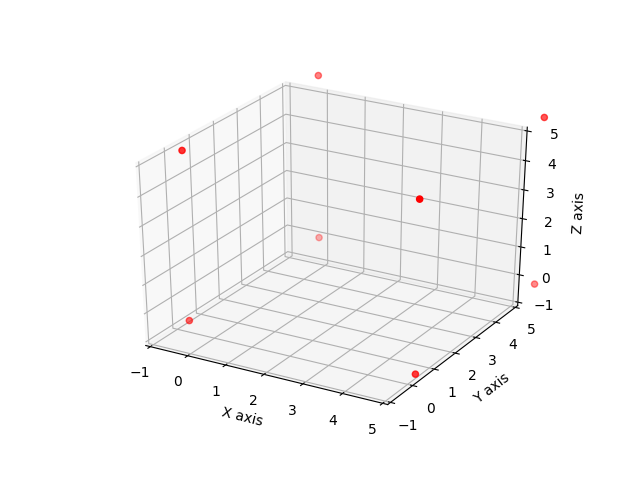

shape = 3
simulation time is 35
[-0.39849472 -0.39849472 -0.39849472]
[-0.39849472 -0.39849472  5.39849472]
[-0.39849472  5.39849472 -0.39849472]
[-0.39849472  5.39849472  5.39849472]
[ 5.39849472 -0.39849472 -0.39849472]
[ 5.39849472 -0.39849472  5.39849472]
[ 5.39849472  5.39849472 -0.39849472]
[5.39849472 5.39849472 5.39849472]
this is the grid layout


<IPython.core.display.Javascript object>


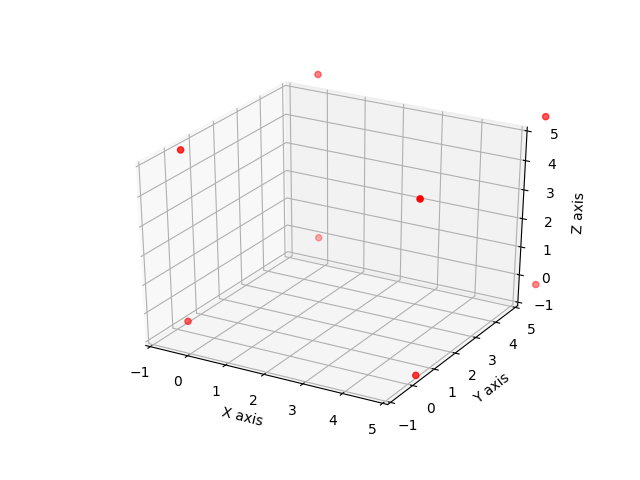

shape = 3
simulation time is 36
[-0.42047277 -0.42047277 -0.42047277]
[-0.42047277 -0.42047277  5.42047277]
[-0.42047277  5.42047277 -0.42047277]
[-0.42047277  5.42047277  5.42047277]
[ 5.42047277 -0.42047277 -0.42047277]
[ 5.42047277 -0.42047277  5.42047277]
[ 5.42047277  5.42047277 -0.42047277]
[5.42047277 5.42047277 5.42047277]
this is the grid layout


<IPython.core.display.Javascript object>


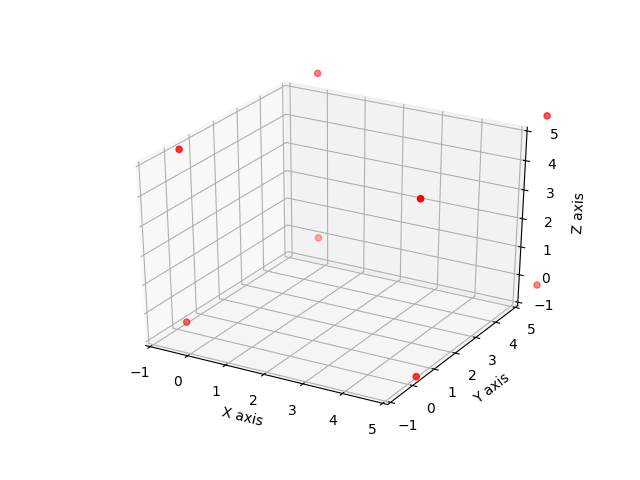

shape = 3
simulation time is 37
[-0.44295503 -0.44295503 -0.44295503]
[-0.44295503 -0.44295503  5.44295503]
[-0.44295503  5.44295503 -0.44295503]
[-0.44295503  5.44295503  5.44295503]
[ 5.44295503 -0.44295503 -0.44295503]
[ 5.44295503 -0.44295503  5.44295503]
[ 5.44295503  5.44295503 -0.44295503]
[5.44295503 5.44295503 5.44295503]
this is the grid layout


<IPython.core.display.Javascript object>


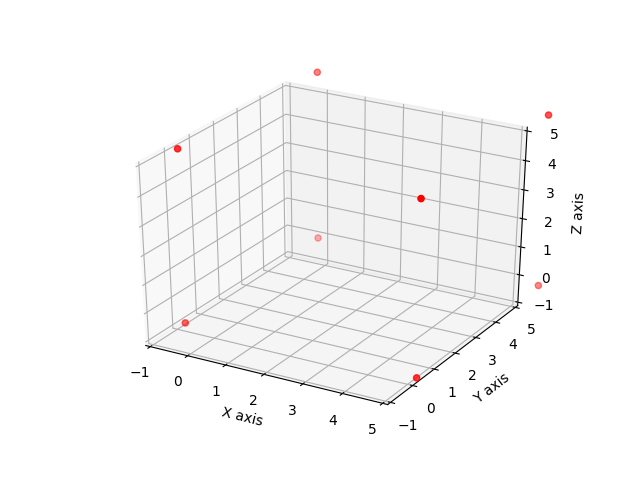

shape = 3
simulation time is 38
[-0.4659339 -0.4659339 -0.4659339]
[-0.4659339 -0.4659339  5.4659339]
[-0.4659339  5.4659339 -0.4659339]
[-0.4659339  5.4659339  5.4659339]
[ 5.4659339 -0.4659339 -0.4659339]
[ 5.4659339 -0.4659339  5.4659339]
[ 5.4659339  5.4659339 -0.4659339]
[5.4659339 5.4659339 5.4659339]
this is the grid layout


<IPython.core.display.Javascript object>


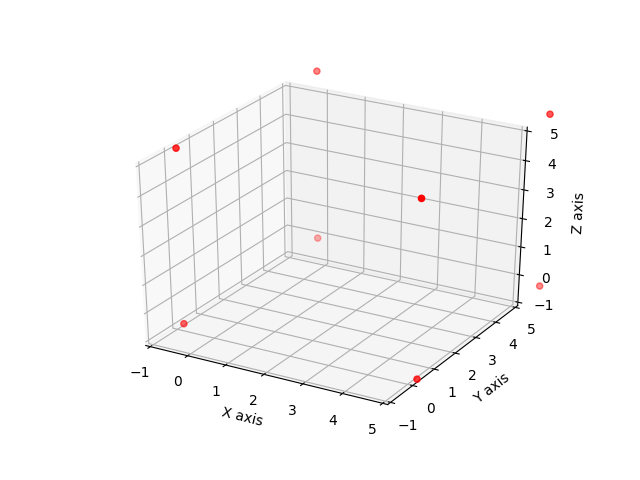

shape = 3
simulation time is 39
[-0.48940177 -0.48940177 -0.48940177]
[-0.48940177 -0.48940177  5.48940177]
[-0.48940177  5.48940177 -0.48940177]
[-0.48940177  5.48940177  5.48940177]
[ 5.48940177 -0.48940177 -0.48940177]
[ 5.48940177 -0.48940177  5.48940177]
[ 5.48940177  5.48940177 -0.48940177]
[5.48940177 5.48940177 5.48940177]
this is the grid layout


<IPython.core.display.Javascript object>


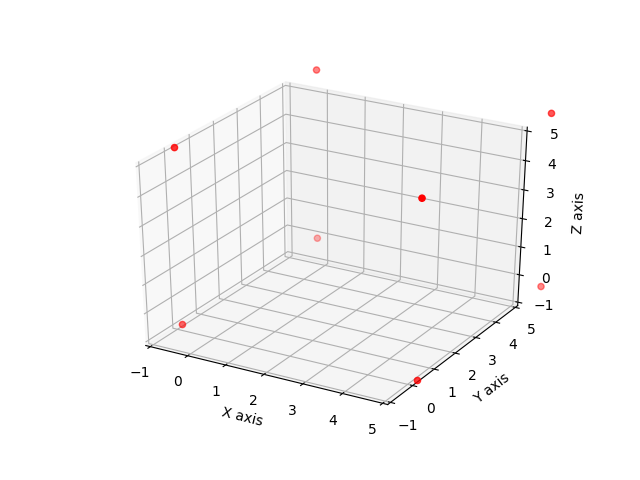

shape = 3
simulation time is 40
[-0.51335102 -0.51335102 -0.51335102]
[-0.51335102 -0.51335102  5.51335102]
[-0.51335102  5.51335102 -0.51335102]
[-0.51335102  5.51335102  5.51335102]
[ 5.51335102 -0.51335102 -0.51335102]
[ 5.51335102 -0.51335102  5.51335102]
[ 5.51335102  5.51335102 -0.51335102]
[5.51335102 5.51335102 5.51335102]
this is the grid layout


<IPython.core.display.Javascript object>


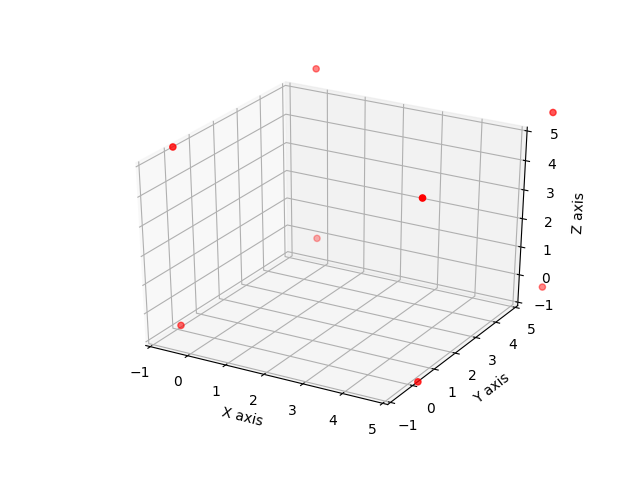

shape = 3
simulation time is 41
[-0.5377741 -0.5377741 -0.5377741]
[-0.5377741 -0.5377741  5.5377741]
[-0.5377741  5.5377741 -0.5377741]
[-0.5377741  5.5377741  5.5377741]
[ 5.5377741 -0.5377741 -0.5377741]
[ 5.5377741 -0.5377741  5.5377741]
[ 5.5377741  5.5377741 -0.5377741]
[5.5377741 5.5377741 5.5377741]
this is the grid layout


<IPython.core.display.Javascript object>


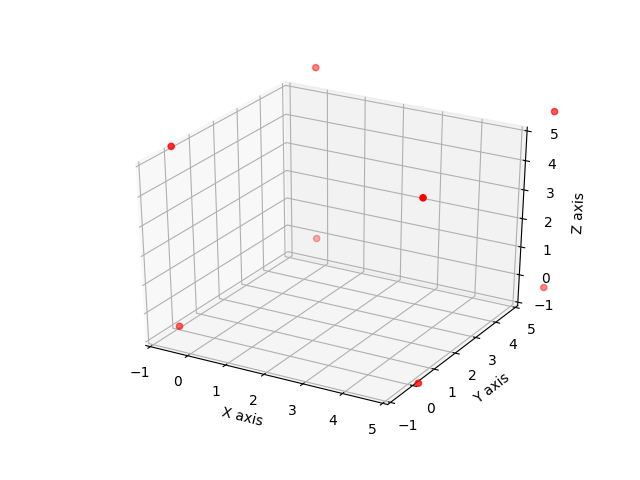

shape = 3
simulation time is 42
[-0.56266345 -0.56266345 -0.56266345]
[-0.56266345 -0.56266345  5.56266345]
[-0.56266345  5.56266345 -0.56266345]
[-0.56266345  5.56266345  5.56266345]
[ 5.56266345 -0.56266345 -0.56266345]
[ 5.56266345 -0.56266345  5.56266345]
[ 5.56266345  5.56266345 -0.56266345]
[5.56266345 5.56266345 5.56266345]
this is the grid layout


<IPython.core.display.Javascript object>


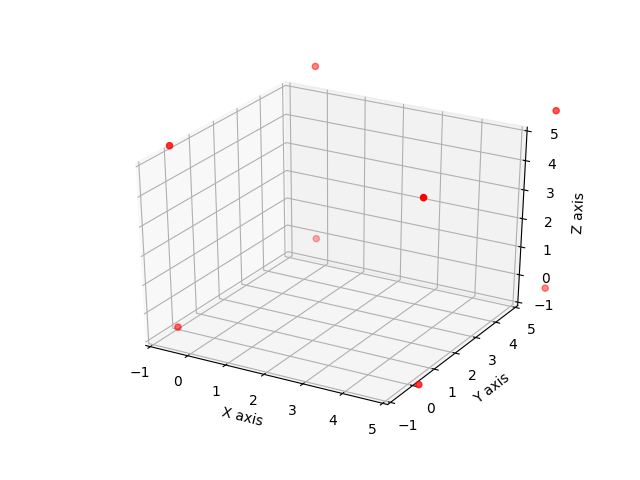

shape = 3
simulation time is 43
[-0.58801157 -0.58801157 -0.58801157]
[-0.58801157 -0.58801157  5.58801157]
[-0.58801157  5.58801157 -0.58801157]
[-0.58801157  5.58801157  5.58801157]
[ 5.58801157 -0.58801157 -0.58801157]
[ 5.58801157 -0.58801157  5.58801157]
[ 5.58801157  5.58801157 -0.58801157]
[5.58801157 5.58801157 5.58801157]
this is the grid layout


<IPython.core.display.Javascript object>


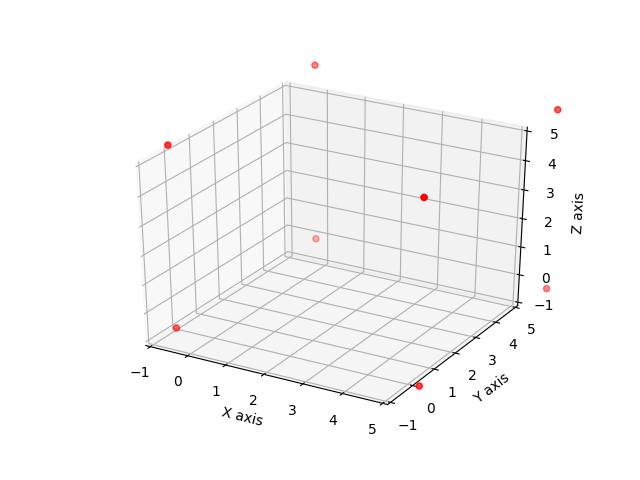

shape = 3
simulation time is 44
[-0.613811 -0.613811 -0.613811]
[-0.613811 -0.613811  5.613811]
[-0.613811  5.613811 -0.613811]
[-0.613811  5.613811  5.613811]
[ 5.613811 -0.613811 -0.613811]
[ 5.613811 -0.613811  5.613811]
[ 5.613811  5.613811 -0.613811]
[5.613811 5.613811 5.613811]
this is the grid layout


<IPython.core.display.Javascript object>


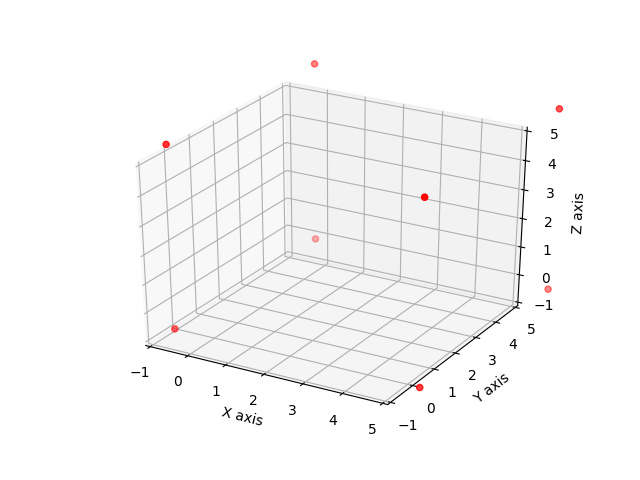

shape = 3
simulation time is 45
[-0.64005432 -0.64005432 -0.64005432]
[-0.64005432 -0.64005432  5.64005432]
[-0.64005432  5.64005432 -0.64005432]
[-0.64005432  5.64005432  5.64005432]
[ 5.64005432 -0.64005432 -0.64005432]
[ 5.64005432 -0.64005432  5.64005432]
[ 5.64005432  5.64005432 -0.64005432]
[5.64005432 5.64005432 5.64005432]
this is the grid layout


<IPython.core.display.Javascript object>


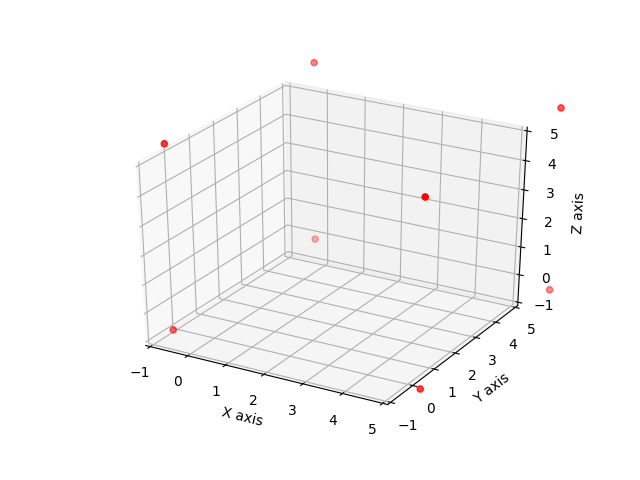

shape = 3
simulation time is 46
[-0.66673417 -0.66673417 -0.66673417]
[-0.66673417 -0.66673417  5.66673417]
[-0.66673417  5.66673417 -0.66673417]
[-0.66673417  5.66673417  5.66673417]
[ 5.66673417 -0.66673417 -0.66673417]
[ 5.66673417 -0.66673417  5.66673417]
[ 5.66673417  5.66673417 -0.66673417]
[5.66673417 5.66673417 5.66673417]
this is the grid layout


<IPython.core.display.Javascript object>


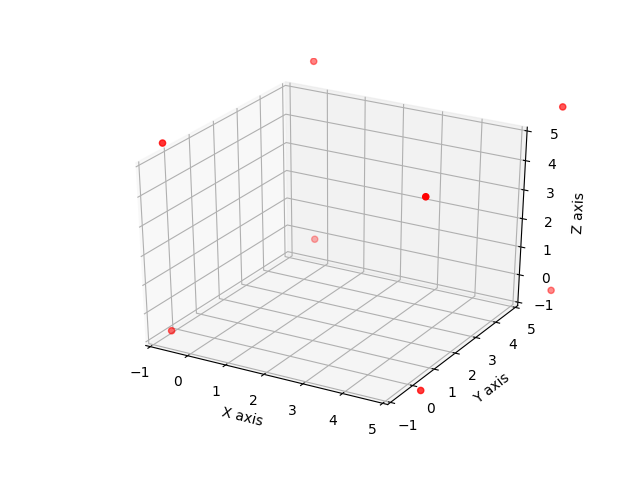

shape = 3
simulation time is 47
[-0.69384327 -0.69384327 -0.69384327]
[-0.69384327 -0.69384327  5.69384327]
[-0.69384327  5.69384327 -0.69384327]
[-0.69384327  5.69384327  5.69384327]
[ 5.69384327 -0.69384327 -0.69384327]
[ 5.69384327 -0.69384327  5.69384327]
[ 5.69384327  5.69384327 -0.69384327]
[5.69384327 5.69384327 5.69384327]
this is the grid layout


<IPython.core.display.Javascript object>


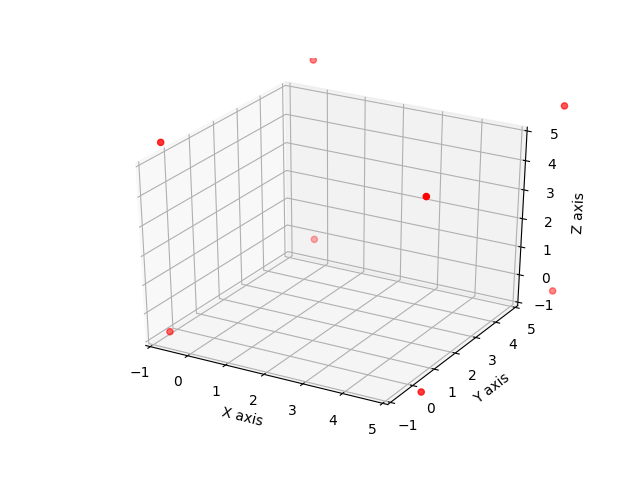

shape = 3
simulation time is 48
[-0.72137437 -0.72137437 -0.72137437]
[-0.72137437 -0.72137437  5.72137437]
[-0.72137437  5.72137437 -0.72137437]
[-0.72137437  5.72137437  5.72137437]
[ 5.72137437 -0.72137437 -0.72137437]
[ 5.72137437 -0.72137437  5.72137437]
[ 5.72137437  5.72137437 -0.72137437]
[5.72137437 5.72137437 5.72137437]
this is the grid layout


<IPython.core.display.Javascript object>


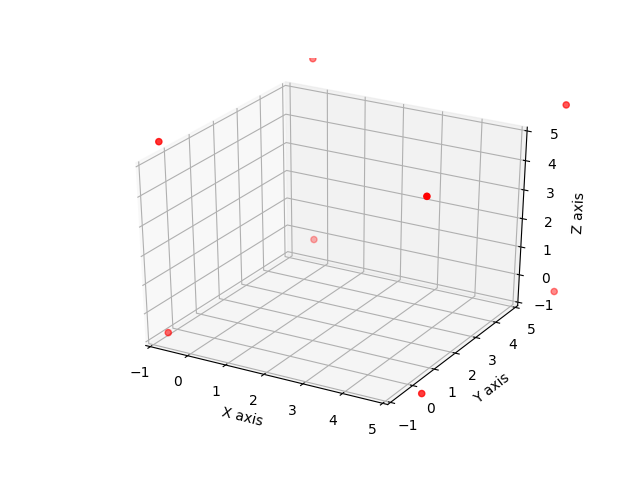

shape = 3
simulation time is 49
[-0.74932033 -0.74932033 -0.74932033]
[-0.74932033 -0.74932033  5.74932033]
[-0.74932033  5.74932033 -0.74932033]
[-0.74932033  5.74932033  5.74932033]
[ 5.74932033 -0.74932033 -0.74932033]
[ 5.74932033 -0.74932033  5.74932033]
[ 5.74932033  5.74932033 -0.74932033]
[5.74932033 5.74932033 5.74932033]
this is the grid layout


<IPython.core.display.Javascript object>


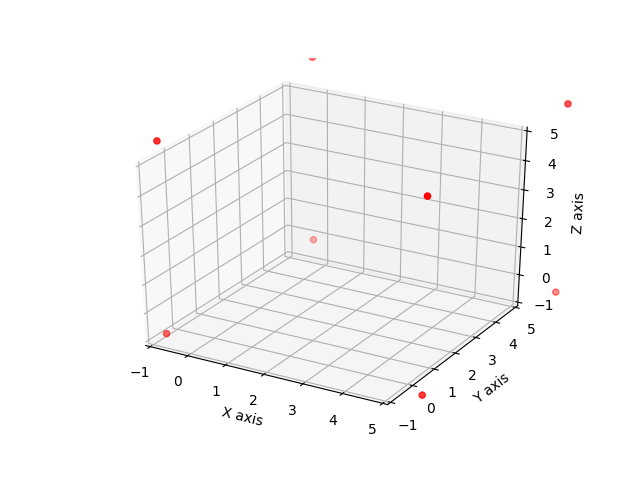

shape = 3
simulation time is 50
[-0.77767406 -0.77767406 -0.77767406]
[-0.77767406 -0.77767406  5.77767406]
[-0.77767406  5.77767406 -0.77767406]
[-0.77767406  5.77767406  5.77767406]
[ 5.77767406 -0.77767406 -0.77767406]
[ 5.77767406 -0.77767406  5.77767406]
[ 5.77767406  5.77767406 -0.77767406]
[5.77767406 5.77767406 5.77767406]
this is the grid layout


<IPython.core.display.Javascript object>


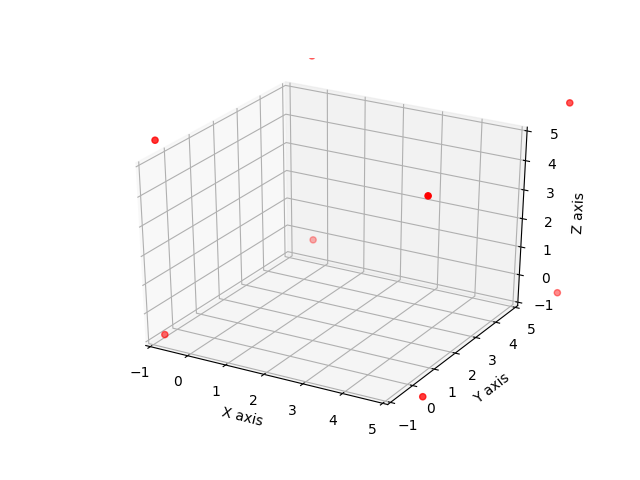

shape = 3
simulation time is 51
[-0.80642856 -0.80642856 -0.80642856]
[-0.80642856 -0.80642856  5.80642856]
[-0.80642856  5.80642856 -0.80642856]
[-0.80642856  5.80642856  5.80642856]
[ 5.80642856 -0.80642856 -0.80642856]
[ 5.80642856 -0.80642856  5.80642856]
[ 5.80642856  5.80642856 -0.80642856]
[5.80642856 5.80642856 5.80642856]
this is the grid layout


<IPython.core.display.Javascript object>


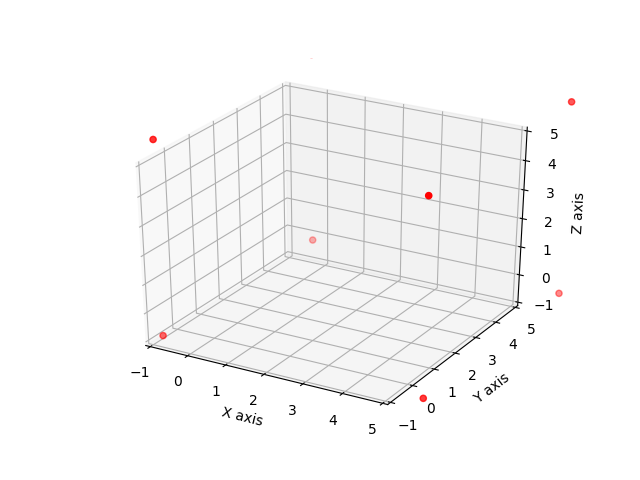

shape = 3
simulation time is 52
[-0.8355769 -0.8355769 -0.8355769]
[-0.8355769 -0.8355769  5.8355769]
[-0.8355769  5.8355769 -0.8355769]
[-0.8355769  5.8355769  5.8355769]
[ 5.8355769 -0.8355769 -0.8355769]
[ 5.8355769 -0.8355769  5.8355769]
[ 5.8355769  5.8355769 -0.8355769]
[5.8355769 5.8355769 5.8355769]
this is the grid layout


<IPython.core.display.Javascript object>


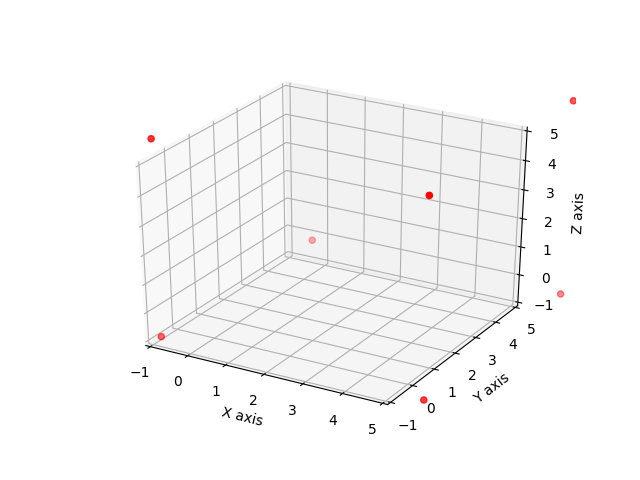

shape = 3
simulation time is 53
[-0.86511225 -0.86511225 -0.86511225]
[-0.86511225 -0.86511225  5.86511225]
[-0.86511225  5.86511225 -0.86511225]
[-0.86511225  5.86511225  5.86511225]
[ 5.86511225 -0.86511225 -0.86511225]
[ 5.86511225 -0.86511225  5.86511225]
[ 5.86511225  5.86511225 -0.86511225]
[5.86511225 5.86511225 5.86511225]
this is the grid layout


<IPython.core.display.Javascript object>


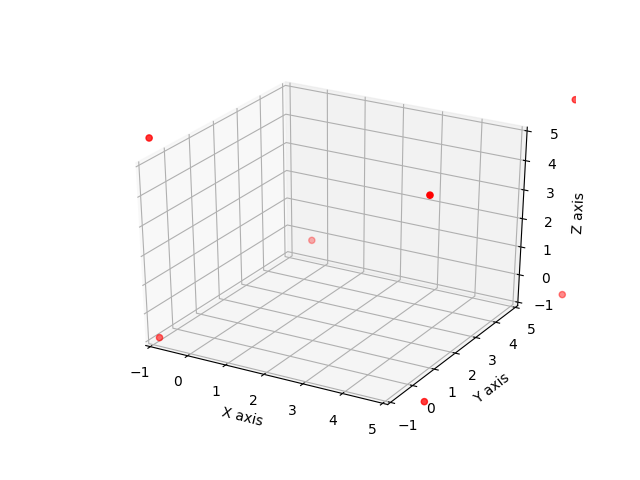

shape = 3
simulation time is 54
[-0.89502786 -0.89502786 -0.89502786]
[-0.89502786 -0.89502786  5.89502786]
[-0.89502786  5.89502786 -0.89502786]
[-0.89502786  5.89502786  5.89502786]
[ 5.89502786 -0.89502786 -0.89502786]
[ 5.89502786 -0.89502786  5.89502786]
[ 5.89502786  5.89502786 -0.89502786]
[5.89502786 5.89502786 5.89502786]
this is the grid layout


<IPython.core.display.Javascript object>


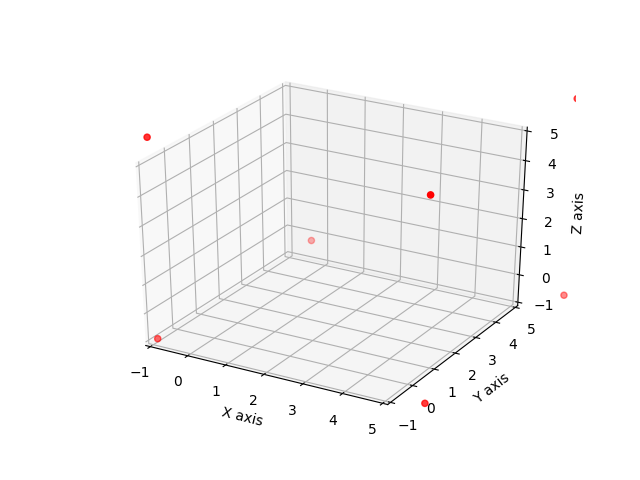

shape = 3
simulation time is 55
[-0.92531707 -0.92531707 -0.92531707]
[-0.92531707 -0.92531707  5.92531707]
[-0.92531707  5.92531707 -0.92531707]
[-0.92531707  5.92531707  5.92531707]
[ 5.92531707 -0.92531707 -0.92531707]
[ 5.92531707 -0.92531707  5.92531707]
[ 5.92531707  5.92531707 -0.92531707]
[5.92531707 5.92531707 5.92531707]
this is the grid layout


<IPython.core.display.Javascript object>


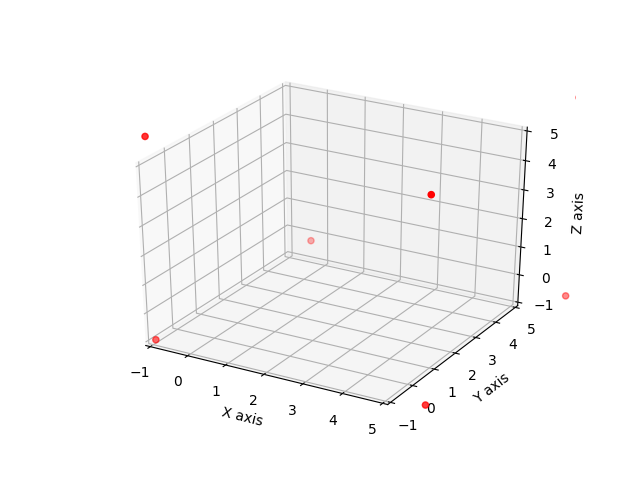

shape = 3
simulation time is 56
[-0.95597331 -0.95597331 -0.95597331]
[-0.95597331 -0.95597331  5.95597331]
[-0.95597331  5.95597331 -0.95597331]
[-0.95597331  5.95597331  5.95597331]
[ 5.95597331 -0.95597331 -0.95597331]
[ 5.95597331 -0.95597331  5.95597331]
[ 5.95597331  5.95597331 -0.95597331]
[5.95597331 5.95597331 5.95597331]
this is the grid layout


<IPython.core.display.Javascript object>


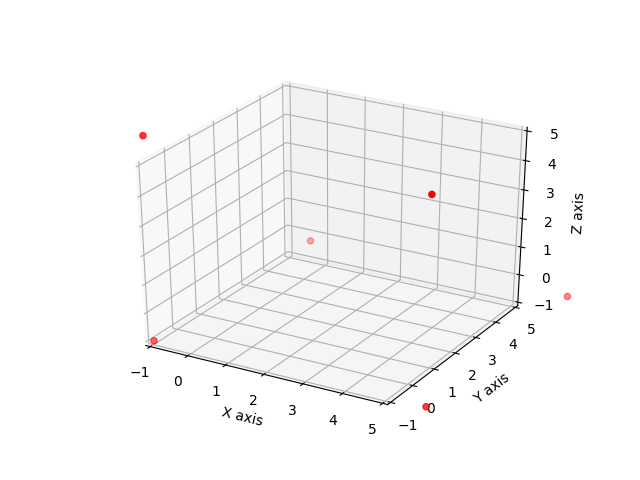

shape = 3
simulation time is 57
[-0.98699012 -0.98699012 -0.98699012]
[-0.98699012 -0.98699012  5.98699012]
[-0.98699012  5.98699012 -0.98699012]
[-0.98699012  5.98699012  5.98699012]
[ 5.98699012 -0.98699012 -0.98699012]
[ 5.98699012 -0.98699012  5.98699012]
[ 5.98699012  5.98699012 -0.98699012]
[5.98699012 5.98699012 5.98699012]
this is the grid layout


<IPython.core.display.Javascript object>


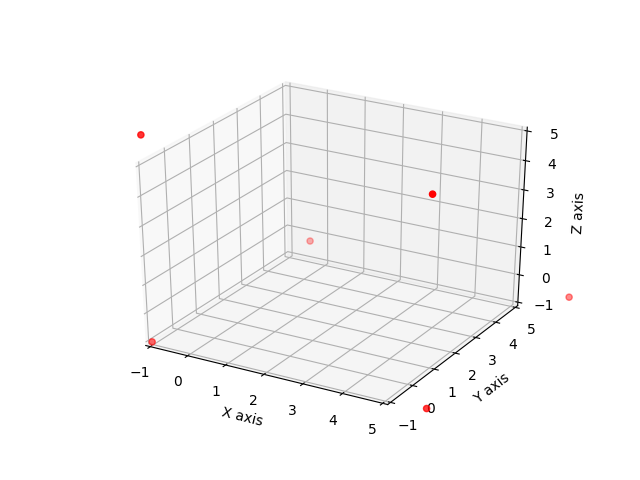

shape = 3
simulation time is 58
[-1.01836111 -1.01836111 -1.01836111]
[-1.01836111 -1.01836111  6.01836111]
[-1.01836111  6.01836111 -1.01836111]
[-1.01836111  6.01836111  6.01836111]
[ 6.01836111 -1.01836111 -1.01836111]
[ 6.01836111 -1.01836111  6.01836111]
[ 6.01836111  6.01836111 -1.01836111]
[6.01836111 6.01836111 6.01836111]
this is the grid layout


<IPython.core.display.Javascript object>


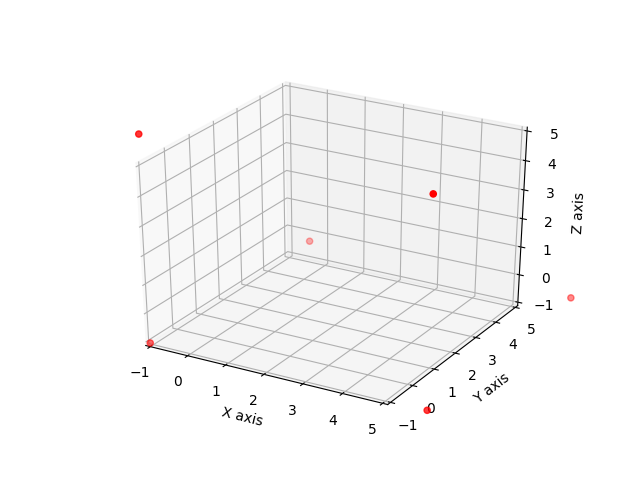

shape = 3
simulation time is 59
[-1.05008001 -1.05008001 -1.05008001]
[-1.05008001 -1.05008001  6.05008001]
[-1.05008001  6.05008001 -1.05008001]
[-1.05008001  6.05008001  6.05008001]
[ 6.05008001 -1.05008001 -1.05008001]
[ 6.05008001 -1.05008001  6.05008001]
[ 6.05008001  6.05008001 -1.05008001]
[6.05008001 6.05008001 6.05008001]


In [17]:
#%lprun plasma_random_Charges(print_all=True)
#%lprun -f jefimenko.charge_current_integrals.field_calculator count = charged_Permittivity_ball()


#%lprun -f jefimenko.plasma.plasma_simulation count = plasma_random_Charges(print_all = True)


%lprun -f jefimenko.plasma.simulate_location count = plasma_random_Charges(print_all = True)
#%lprun -f jefimenko.charge_current_integrals.field_calculator count = plasma_random_Charges(print_all = True)

In [18]:
def plasma_random_Charges(print_all=False):
    time_L = 6
    delta_t = .1
    mapping = jefimenko.Grid(delta=[1,1,1],  # this is the size of a step in x, y and z
                size=[5,5,5],  # this is the size of the grid in meters
                time=time_L,  # this is the length of a simulation in secounds
                delta_t=delta_t,  # this is the size of a full time step
                constant_E=[0,0,0],
                constant_H=[0,0,0]
        )
    A = 3
    for i in range(A):
        for j in range(A):
            for k in range(A):
                location = [10 / A * i, 10 / A * j, 10 / A * k]
                print(location)
                mapping.Add_Charge(location, Q = .00001, velocity=[0,0,0], acceleration=[0,0,0], mass=1)
    
    print('simulation starting')
    #jefimenko.simulate(mapping)
    jefimenko.plasma_simulation(mapping)
    #jefimenko.simulate(mapping)
    
    
    #for time in range(int(time_L / delta_t)):
    #    jefimenko.plot_grid(mapping, time)
        #jefimenko.plot_EM_grid('E', mapping, time)
        #jefimenko.plot_EM_grid('H', mapping, time)
    #    print('simulation time is ' + str(time))
    #    for i in range(len(mapping.charges[time])):
    #        print(mapping.charges[time][i].location)
    #return()

In [19]:
#%time count = plasma_random_Charges(print_all = False)

#%lprun plasma_random_Charges(print_all=True)
#%lprun -f jefimenko.charge_current_integrals.field_calculator count = charged_Permittivity_ball()


#%lprun -f jefimenko.plasma.plasma_simulation count = plasma_random_Charges(print_all = True)


%lprun -f jefimenko.plasma.simulate_location count = plasma_random_Charges(print_all = True)

#%lprun -f jefimenko.plasma.location_process count = plasma_random_Charges(print_all = True)

#%lprun -f jefimenko.charge_current_integrals.field_calculator count = plasma_random_Charges(print_all = True)

#%lprun -f jefimenko.charge_current_integrals.Electric_field_charges count = plasma_random_Charges(print_all = True)
#%lprun -f jefimenko.charge_current_integrals.Magnetic_field_charges count = plasma_random_Charges(print_all = True)

[0.0, 0.0, 0.0]
[0.0, 0.0, 3.3333333333333335]
[0.0, 0.0, 6.666666666666667]
[0.0, 3.3333333333333335, 0.0]
[0.0, 3.3333333333333335, 3.3333333333333335]
[0.0, 3.3333333333333335, 6.666666666666667]
[0.0, 6.666666666666667, 0.0]
[0.0, 6.666666666666667, 3.3333333333333335]
[0.0, 6.666666666666667, 6.666666666666667]
[3.3333333333333335, 0.0, 0.0]
[3.3333333333333335, 0.0, 3.3333333333333335]
[3.3333333333333335, 0.0, 6.666666666666667]
[3.3333333333333335, 3.3333333333333335, 0.0]
[3.3333333333333335, 3.3333333333333335, 3.3333333333333335]
[3.3333333333333335, 3.3333333333333335, 6.666666666666667]
[3.3333333333333335, 6.666666666666667, 0.0]
[3.3333333333333335, 6.666666666666667, 3.3333333333333335]
[3.3333333333333335, 6.666666666666667, 6.666666666666667]
[6.666666666666667, 0.0, 0.0]
[6.666666666666667, 0.0, 3.3333333333333335]
[6.666666666666667, 0.0, 6.666666666666667]
[6.666666666666667, 3.3333333333333335, 0.0]
[6.666666666666667, 3.3333333333333335, 3.3333333333333335]
[6.66